Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## from sklearn.model_selection import train_test_split splite gerek olmadığı için yorumda
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
## from scipy.special import softmax
from sklearn.linear_model import LogisticRegression
## from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
## from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Python libraries required for data analysis, visualization, preprocessing, and training machine learning models have been imported. Pandas and NumPy were used for data manipulation; Matplotlib and Seaborn were used for visualization; and Scikit-learn was used for classification models, data standardization, and performance metrics.

## Loading and Analyzing Data

The training data was loaded from the `datatraining.txt` file using `pandas`. The dataset consists of 8143 rows and 7 columns. By examining the first five rows, it was seen that the data columns were date, temperature, humidity, light, CO₂, humidity rate and `Occupancy` (room occupancy) to be classified, respectively.

In [2]:
df = pd.read_csv("datatraining.txt")
print( df.shape)
df.head()


(8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Data Structure and Statistical Summary

To understand the general structure of the dataset, `df.info()` and `df.describe()` functions were used. It was observed that there were no missing data in all columns. The data includes temperature, humidity, light, CO₂, humidity and occupancy. High variance was observed in `Light` and `CO2` variables, indicating that these variables may be important for classification. In addition, `Occupancy` class has 1 (occupancy) value in 21%, indicating that class imbalance should be taken into consideration.

In [3]:
df.info() # Data types.To see if there is any empty data
df.describe()    # summary statistics

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Checked if there are any dublicate data

In [4]:
# Is there any duplicate datas
duplicates = df.duplicated()

# How many duplicates
print(duplicates.sum())

0


no duplicate data, zero duplicates.

## Correlation Heatmap

A heatmap based on Pearson correlation coefficient was created to understand the relationship between numerical variables in the dataset. A high correlation was observed between `Occupancy` variable and `Light` (0.91) and `CO2` (0.71). The correlation of 0.54 between `Temperature` and `Occupancy` is not as high as the others, but it is significant and shows that this variable can also be useful for the model.

In addition, a very high correlation of 0.96 was found between `Humidity` and `HumidityRatio`. Such a high correlation indicates that there is multicollinearity between the variables. This can negatively affect the performance of some models and unnecessarily repeats the information that the model needs to learn. Therefore, only one of these two variables should be used. The variable `HumidityRatio` has a correlation of 0.30 with `Occupancy`, while `Humidity` shows only a correlation of 0.13. For this reason, `HumidityRatio` is preferred in feature selection.

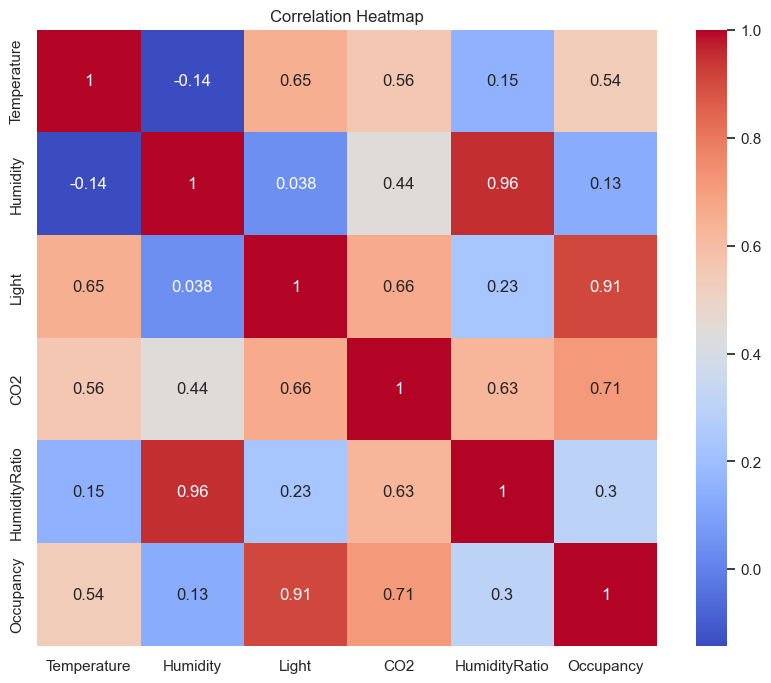

In [5]:
##correlation heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


“A strong correlation (r = 0.91) between Light and Occupancy suggests that this feature plays a dominant role in determining room usage. High correlation between Humidity and HumidityRatio (r = 0.96) raises concerns about multicollinearity, and one of them may be dropped in future modeling.”

##Distrubution Plots

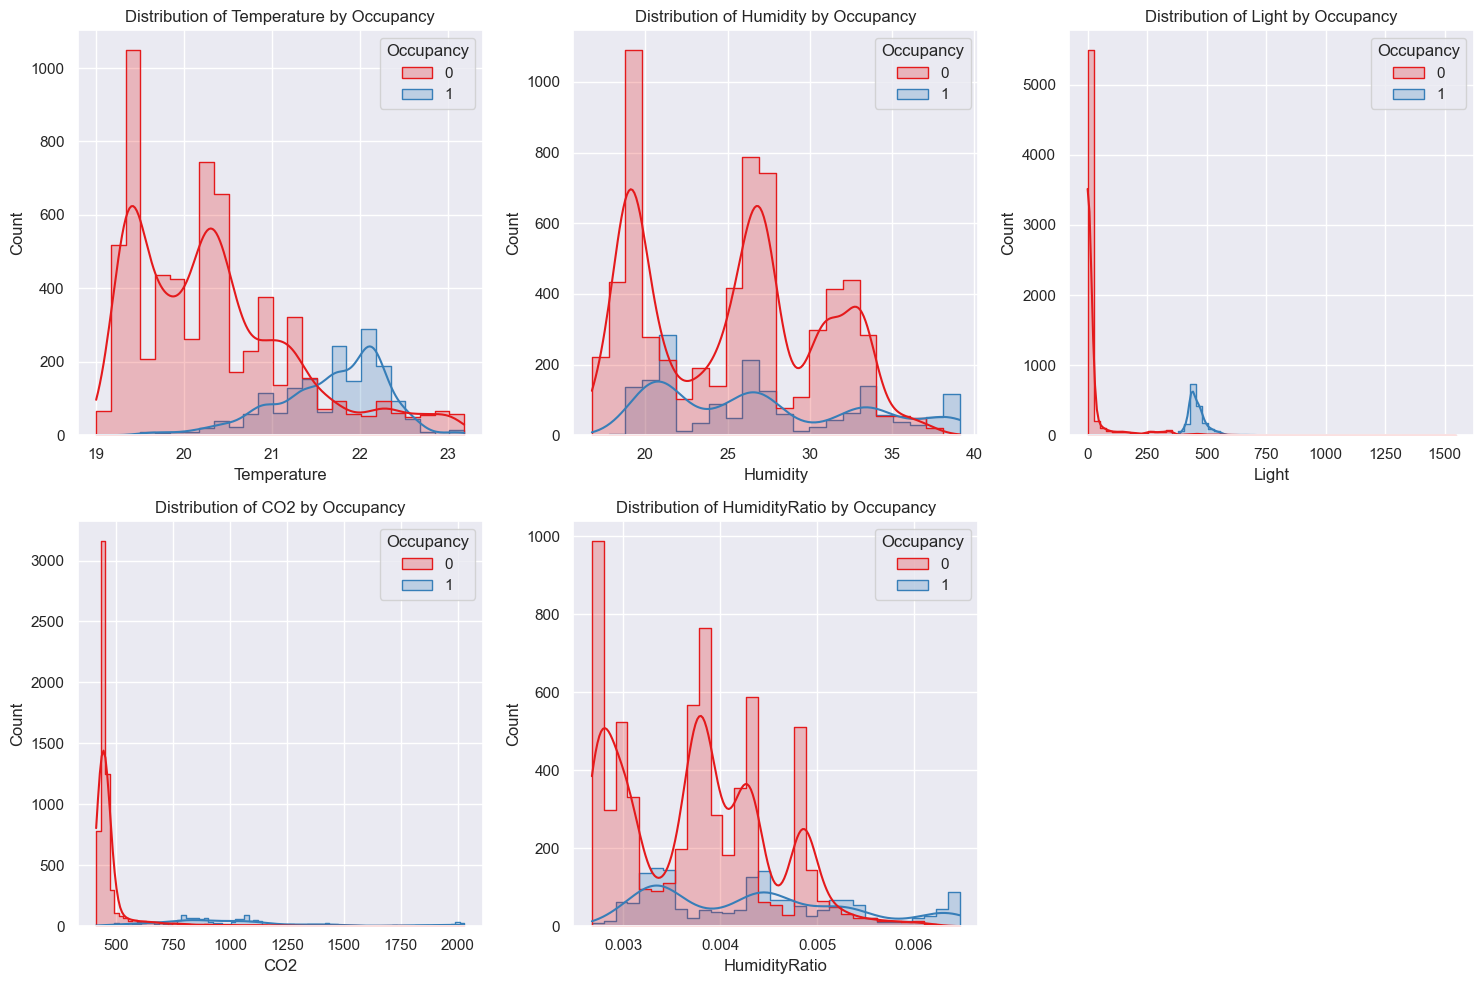

In [6]:
#distrubition plots
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

plt.figure(figsize=(15,10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    
    sns.histplot(data=df, x=feature, hue='Occupancy', 
                 element="step", stat="count", common_norm=False, kde=True,
                 palette="Set1") 
    
    plt.title(f'Distribution of {feature} by Occupancy')

plt.tight_layout()
plt.show()


According to the distribution histograms, occupancy is typically 1 when the Light value exceeds approximately 375, showing a strong separation between occupied and unoccupied states.

Additionally, CO₂ levels above 600 ppm are commonly associated with occupied conditions, and CO₂ tends to increase as people enter the room. When occupancy is 0, CO₂ remains low and stable.

For Temperature, occupancy tends to be 1 within the range of 20°C to 23°C, although the separation is not as sharp as for Light or CO₂.

In contrast, Humidity and Humidity Ratio do not exhibit clear separation patterns between occupied and unoccupied states based on these distribution plots, suggesting they may have lower discriminative power on their own

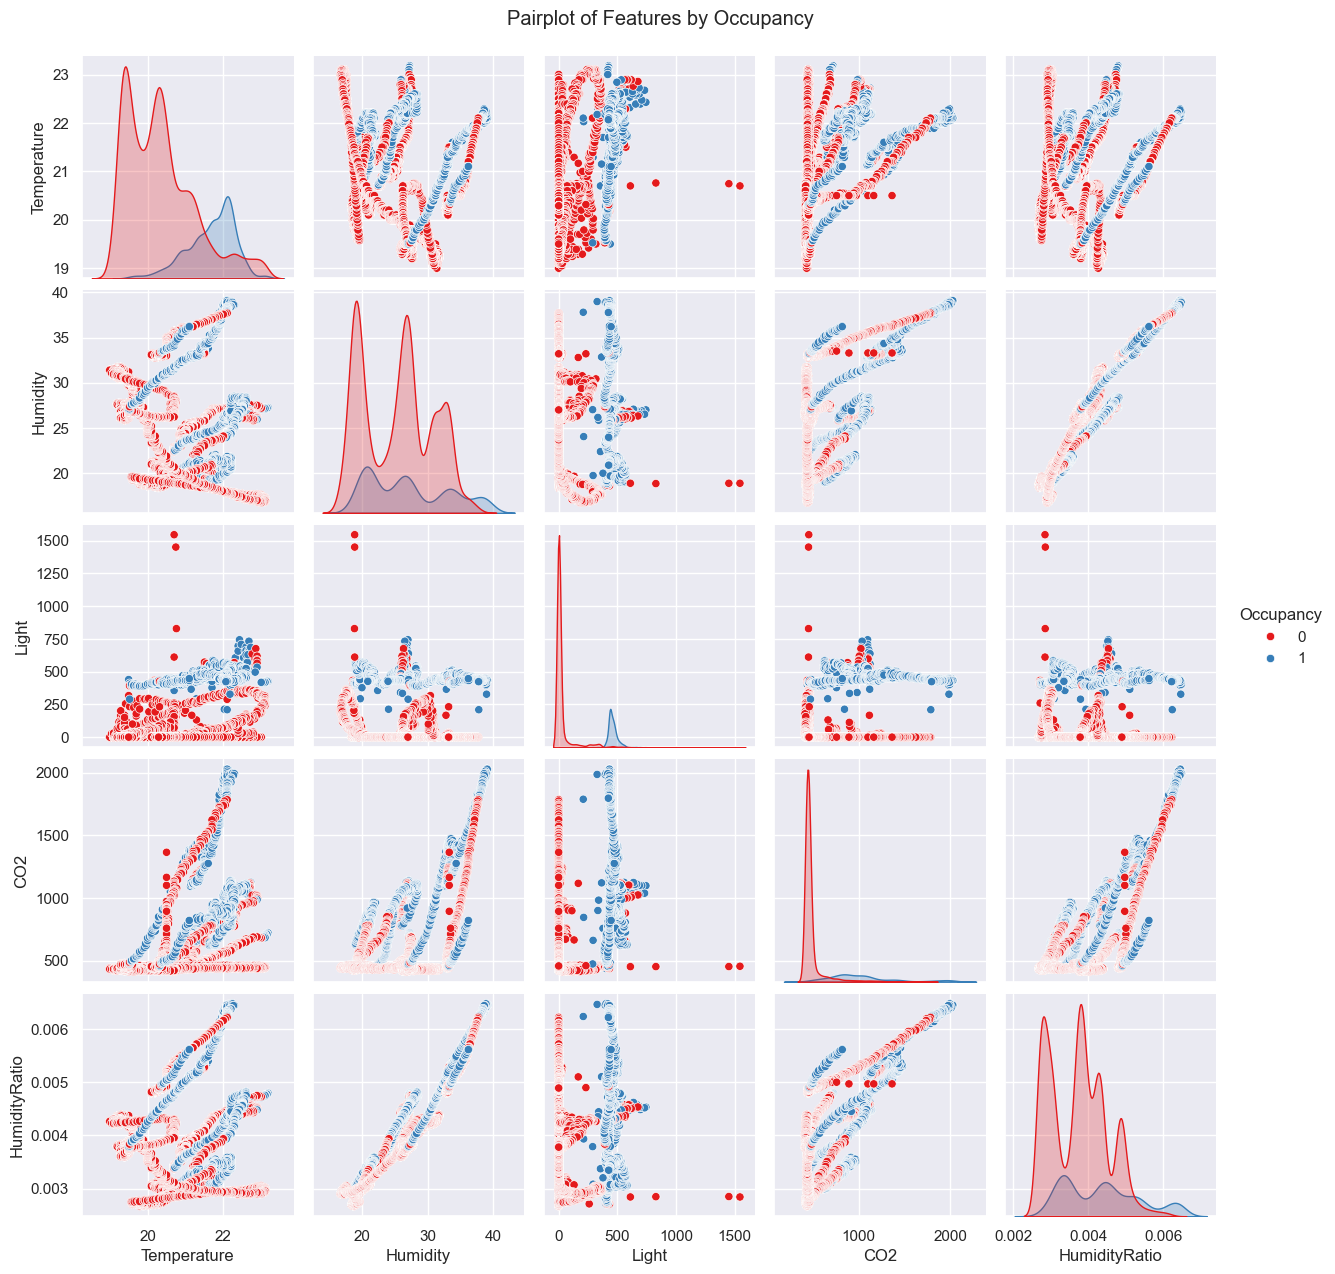

In [7]:
#numerical values x occupancy
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
pairplot_data = df[features]

# Pairplot
sns.pairplot(pairplot_data, hue='Occupancy', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Features by Occupancy', y=1.02)
plt.show()


according to pairplots; again light and co2 is seen as most significant. 
when humidity is between 30 and 35 and humidity ratio is between 0.005 and 0.0055, occupancy might be increased.

According to the pairplots, Light and CO₂ once again emerge as the most significant features for predicting occupancy. Data points with high light intensity and elevated CO₂ levels are consistently associated with occupied conditions.

Additionally, a moderate clustering of occupancy = 1 can be observed when Humidity ranges between 30 and 35, and Humidity Ratio falls within 0.005 to 0.0055, although the separation is not as clear as with Light and CO₂.

These patterns support the earlier findings from the distribution plots and correlation heatmap, reinforcing the importance of these variables in the classification task.

In [8]:
## to check whether certain ranges of Humidity and HumidityRatio influence Occupancy, I filtered the data based on those ranges and analyzed the resulting Occupancy distribution.
filtered = df[(df["Humidity"] >= 30) & (df["Humidity"] <= 35) & (df["HumidityRatio"] >= 0.005) & (df["HumidityRatio"] <= 0.0055)]
print(filtered["Occupancy"].value_counts())

Occupancy
1    218
0    133
Name: count, dtype: int64


there is no significant relation.

Although there appears to be a slightly higher number of occupied instances in the specified Humidity and Humidity Ratio range, the distribution is not strong enough to suggest a statistically significant relationship. Therefore, we consider that these features alone do not effectively predict occupancy.

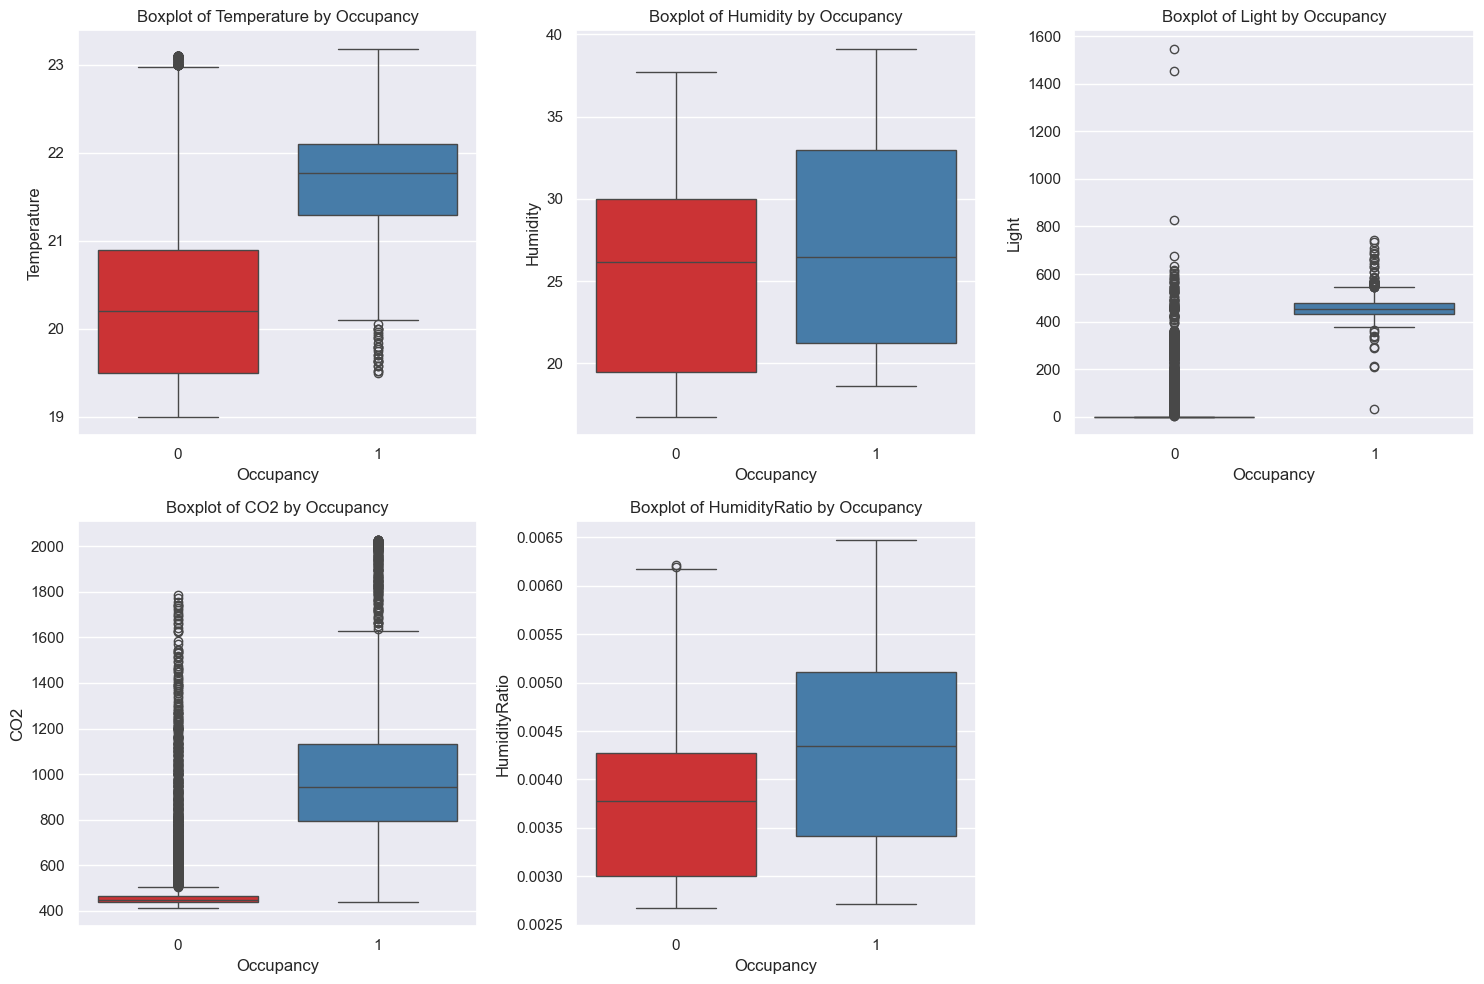

In [9]:
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

plt.figure(figsize=(15,10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    
    sns.boxplot(data=df, x='Occupancy', y=feature, hue='Occupancy', palette="Set1", dodge=False, legend=False)
    
    plt.title(f'Boxplot of {feature} by Occupancy')

plt.tight_layout()
plt.show()


Boxplots shows that Light is the most distinctive feature for occupancy classification, with non-overlapping medians and interquartile ranges. CO₂ also exhibits a significant shift, with higher and more variable values under occupied conditions. While Temperature, Humidity, and HumidityRatio show modest shifts, their predictive strength may be limited when used alone.

## Feature Engineering

Based on the reference paper, we created two new features from the `date` column:

- `weekday`: Encodes the day of the week as an integer (Monday=1, Sunday=7), to help the model recognize weekly behavioral cycles.
- `workhour`: A binary variable that is 1 if the time is within standard working hours (08:00–13:00 or 13:30–18:00), and 0 otherwise.

These features aim to help the model capture patterns in human activity aligned with calendar schedules. They were applied to all datasets (train and test) to ensure consistency.


In [10]:
# File reading
dataTrain = pd.read_csv("datatraining.txt")
dataTest = pd.read_csv("datatest.txt")
dataTest2 = pd.read_csv("datatest2.txt")
# defining new features
def add_custom_features(df):
    df['date'] = pd.to_datetime(df['date'])

    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute
    df['hour_decimal'] = df['hour'] + df['minute'] / 60

# 1=monday ve 7=sunday as integers
    df['weekday'] = df['date'].dt.dayofweek + 1  # 1=monday ve 7=sunday as integers
# from the paper workhours are betwwen 08.00-13.00 and 13.30-18.00. workhour=1, if not=0.
    df['workhour'] = df['hour_decimal'].apply(
        lambda x: 1 if (8 <= x < 13 or 13.5 <= x <= 18) else 0
    )

    return df


#  applying new features to all traina nd test datasets
dataTrain = add_custom_features(dataTrain)
dataTest = add_custom_features(dataTest)
dataTest2 = add_custom_features(dataTest2)


## Correlation Analysis with New Features

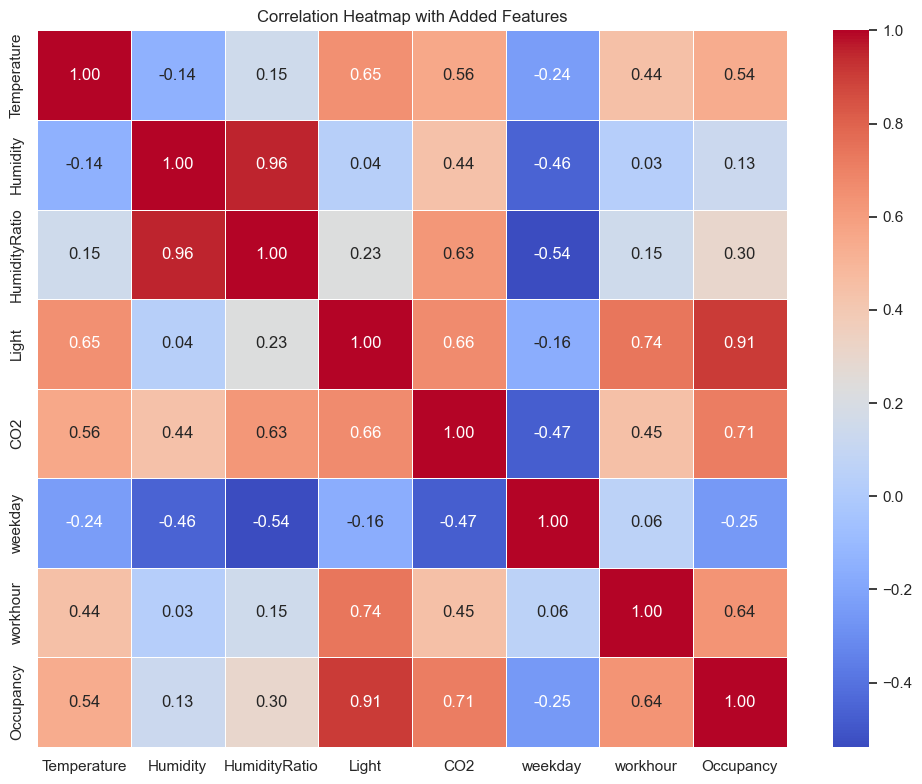

In [11]:
# with new features 
features_for_heatmap = ['Temperature', 'Humidity', 'HumidityRatio', 'Light', 'CO2', 'weekday', 'workhour', 'Occupancy']

# correlation heatmap calculation
corr_matrix = dataTrain[features_for_heatmap].corr()
# plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Added Features")
plt.tight_layout()
plt.show()


After adding the engineered features (`weekday` and `workhour`), we recalculated the correlation matrix:

- `workhour` shows strong positive correlation with `Occupancy` (0.64), confirming its usefulness.
- `weekday` has a weak negative correlation (-0.25), indicating some weekly variation in occupancy.
- `Light` (0.91) and `CO2` (0.71) remain highly correlated with occupancy.
- `Humidity` and `HumidityRatio` still show very high correlation (0.96), so only one should be used.

These results confirm the added features' value—especially `workhour`—in improving classification performance.


# Selected Features
According to correlation heatmap boxplots, pairplots and distribution graphs features selected as; CO2, Light, HumidityRatio and Temperature. Also, both of the two newly created features are selectedd to train models which are weekday and workhour.

In [12]:
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']

### Data Consistency Check
To confirm that the dataset is correctly read and the new features behave as expected, we calculated average occupancy grouped by `weekday` and `workhour`. These checks help verify logical consistency before modeling.


In [13]:
dataTrain.groupby('weekday')['Occupancy'].mean()


weekday
1    0.370833
2    0.094077
3    0.043360
4    0.374306
5    0.406944
6    0.000000
7    0.000000
Name: Occupancy, dtype: float64

In [14]:
dataTrain.groupby('workhour')['Occupancy'].mean()


workhour
0    0.015607
1    0.558077
Name: Occupancy, dtype: float64

## readind

In [15]:


train_df = pd.read_csv("datatraining.txt")
test1_df = pd.read_csv("datatest.txt")
test2_df = pd.read_csv("datatest2.txt")



In [16]:
print(dataTrain[['date', 'hour', 'minute', 'hour_decimal', 'weekday', 'workhour']].head())


                 date  hour  minute  hour_decimal  weekday  workhour
1 2015-02-04 17:51:00    17      51     17.850000        3         1
2 2015-02-04 17:51:59    17      51     17.850000        3         1
3 2015-02-04 17:53:00    17      53     17.883333        3         1
4 2015-02-04 17:54:00    17      54     17.900000        3         1
5 2015-02-04 17:55:00    17      55     17.916667        3         1


In [17]:
print(df.dtypes)


date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object


# Building, Training and Testing Statistical Machine Learning Algorithms

## LOGISTIC REGRESSION

Train Accuracy: 0.9861230504727987
Test 1 Accuracy: 0.9786116322701689

Test 1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9642124692370796

Test 2 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7703
           1       0.97      0.85      0.91      2049

    accuracy                           0.96      9752
   macro avg       0.97      0.92      0.94      9752
weighted avg       0.96      0.96      0.96      9752



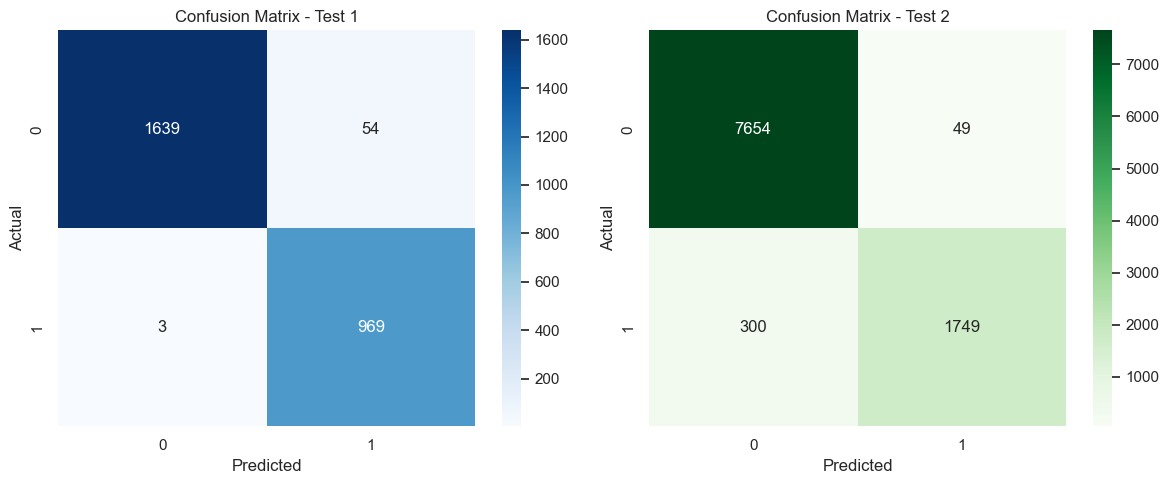

In [18]:
# Features and labels
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Logisting regression training.
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicts
y_pred1 = model.predict(X_test1_scaled)
y_pred2 = model.predict(X_test2_scaled)

# Train Accuracy
y_pred_train = model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Outputs for Test Data 1
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Classification Report:\n", classification_report(y_test1, y_pred1))
cm1 = confusion_matrix(y_test1, y_pred1)

# Outputs for Test Data 2
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Classification Report:\n", classification_report(y_test2, y_pred2))
cm2 = confusion_matrix(y_test2, y_pred2)

# Confusion Matrix Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Test 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


### Logistic Regression Results

We applied Logistic Regression using the selected features: `Light`, `CO2`, `workhour`, `Temperature`, `HumidityRatio`, and `weekday`. Before training, we used `StandardScaler` to scale the data and improve model performance.

- **Train Accuracy**: 0.9861  
  The model learned the training data well and achieved very high accuracy.

- **Test 1 Accuracy**: 0.9786  
  The classification report shows high precision and recall for both classes. There were only a few wrong predictions (54 false positives and 3 false negatives), which means the model works very well on similar data.

- **Test 2 Accuracy**: 0.9642  
  The model still performs well on a more different dataset. However, recall for the occupied class (1) dropped to 0.85, with 300 false negatives. This shows a small overfitting problem and lower generalization.

- The confusion matrices confirm that the model is strong, especially for identifying unoccupied rooms. The second test shows that it sometimes misses occupied rooms.

Overall, Logistic Regression is a good baseline model, and the selected features helped it perform well.


## Optimized C-Value Logistic Regression (Grid Search)

Best C: 0.1
Train Accuracy: 0.9867370747881616
Test 1 Accuracy: 0.9786116322701689

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test 2 Accuracy: 0.9796964725184577

Test 2 Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7703
           1       0.97      0.93      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.98      0.96      0.97      9752
weighted avg       0.98      0.98      0.98      9752



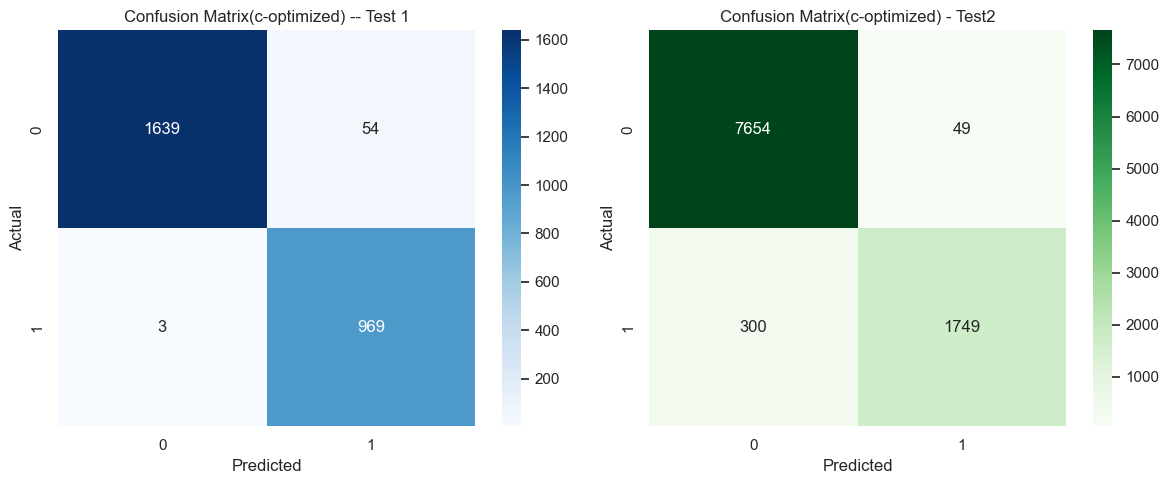

In [19]:
from sklearn.model_selection import GridSearchCV
#  Feature and label
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

#  Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

#  grid search for c
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# best model
best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])


y_pred1 = best_model.predict(X_test1_scaled)
y_pred2 = best_model.predict(X_test2_scaled)

# Train Accuracy
y_pred_train = best_model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# performance
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("\nTest 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))

# Confusion Matrix Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix(c-optimized) -- Test 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix(c-optimized) - Test2")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


### Logistic Regression (C-optimized)

To improve performance, we used GridSearchCV to find the best `C` value for the Logistic Regression model. The best value was `C=0.1`. After applying it:

- **Train Accuracy**: 98.67%
- **Test 1 Accuracy**: 97.86% (same)
- **Test 2 Accuracy**: **97.97%** (up from 96.42%)

F1-scores and precision also improved, especially for class 1. Confusion matrices show fewer false negatives, indicating better generalization.


## One Hot Encoding to Improve Logistic Regression

Train Accuracy: 0.9856318310205084


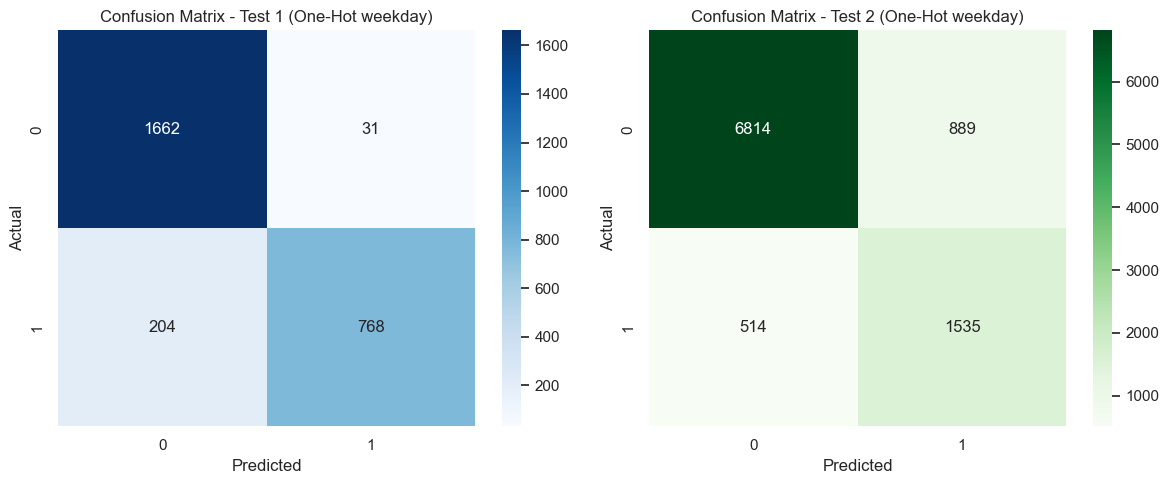

Test 1 Accuracy: 0.9118198874296435

Test 1 Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1693
           1       0.96      0.79      0.87       972

    accuracy                           0.91      2665
   macro avg       0.93      0.89      0.90      2665
weighted avg       0.92      0.91      0.91      2665


Test 2 Accuracy: 0.8561320754716981

Test 2 Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      7703
           1       0.63      0.75      0.69      2049

    accuracy                           0.86      9752
   macro avg       0.78      0.82      0.80      9752
weighted avg       0.87      0.86      0.86      9752



In [20]:

#One-hot encodingfor weekday
dataTrain_enc = pd.get_dummies(dataTrain, columns=['weekday'], prefix='day', drop_first=True)
dataTest_enc = pd.get_dummies(dataTest, columns=['weekday'], prefix='day', drop_first=True)
dataTest2_enc = pd.get_dummies(dataTest2, columns=['weekday'], prefix='day', drop_first=True)


dataTest_enc = dataTest_enc.reindex(columns=dataTrain_enc.columns, fill_value=0)
dataTest2_enc = dataTest2_enc.reindex(columns=dataTrain_enc.columns, fill_value=0)

# feature list
selected_features_enc = [col for col in dataTrain_enc.columns if col not in ['Occupancy', 'date', 'hour', 'minute', 'hour_decimal']]

# X and y seperation
X_train = dataTrain_enc[selected_features_enc]
y_train = dataTrain_enc['Occupancy']
X_test1 = dataTest_enc[selected_features_enc]
y_test1 = dataTest_enc['Occupancy']
X_test2 = dataTest2_enc[selected_features_enc]
y_test2 = dataTest2_enc['Occupancy']

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred1 = model.predict(X_test1_scaled)
y_pred2 = model.predict(X_test2_scaled)

# Train Accuracy
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))


#Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (One-Hot weekday)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (One-Hot weekday)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))

print("\nTest 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


### Logistic Regression with One-Hot Encoded Weekday

To improve performance, we applied one-hot encoding to the `weekday` feature. The idea was to give the model more flexibility to learn specific day patterns. However, results show that this approach did not improve accuracy. 

- Train Accuracy: 0.986
- Test 1 Accuracy: 0.91
- Test 2 Accuracy: 0.86

Especially in Test 2, the performance dropped. This suggests overfitting: the model learned training patterns too well but failed to generalize. Therefore, using one-hot encoding for weekday may not be beneficial for this task.


### Threshold Adjustment (Logistic Regression)



Train Accuracy: 0.9856318310205084


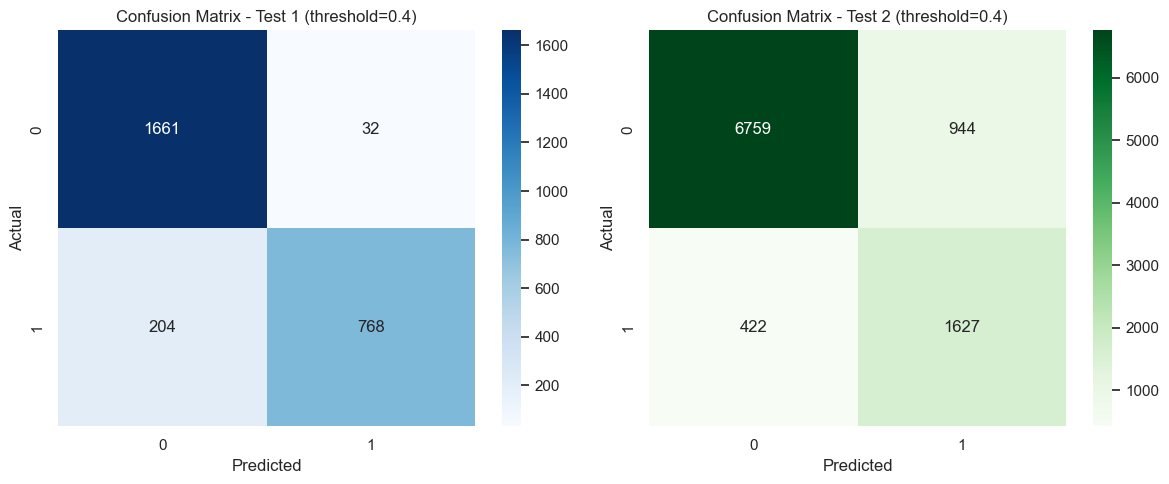

Test 1 Accuracy (threshold=0.4): 0.9114446529080675

Test 1 Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1693
           1       0.96      0.79      0.87       972

    accuracy                           0.91      2665
   macro avg       0.93      0.89      0.90      2665
weighted avg       0.92      0.91      0.91      2665

Test 2 Accuracy (threshold=0.4): 0.8599261689909762

Test 2 Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7703
           1       0.63      0.79      0.70      2049

    accuracy                           0.86      9752
   macro avg       0.79      0.84      0.81      9752
weighted avg       0.88      0.86      0.87      9752



In [21]:
# Predict
y_probs1 = model.predict_proba(X_test1_scaled)[:, 1]
y_probs2 = model.predict_proba(X_test2_scaled)[:, 1]

# 0.4 tRESHOLD
threshold = 0.4
y_pred1_thresh = (y_probs1 > threshold).astype(int)
y_pred2_thresh = (y_probs2 > threshold).astype(int)

# Train accuracy (default threshold = 0.5)
y_train_pred = model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))


# Confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1_thresh)
cm2 = confusion_matrix(y_test2, y_pred2_thresh)

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Test 1 (threshold={threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - Test 2 (threshold={threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Accuracy
print(f"Test 1 Accuracy (threshold={threshold}):", accuracy_score(y_test1, y_pred1_thresh))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1_thresh))
print(f"Test 2 Accuracy (threshold={threshold}):", accuracy_score(y_test2, y_pred2_thresh))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2_thresh))


I tried lowering the default threshold from 0.5 to 0.4 to improve recall for the occupied class. 

- **Train Accuracy:** 0.9856  
- **Test 1 Accuracy:** 0.9114  
- **Test 2 Accuracy:** 0.8599  

Although recall increased slightly, especially for the occupied class, the overall accuracy decreased due to more false positives. This trade-off is common in threshold tuning. In this case, we concluded that lowering the threshold did not improve our model overall.

### Logistic Regression - Z-Score Based Outlier Removal



Train Accuracy: 0.9862477920767095


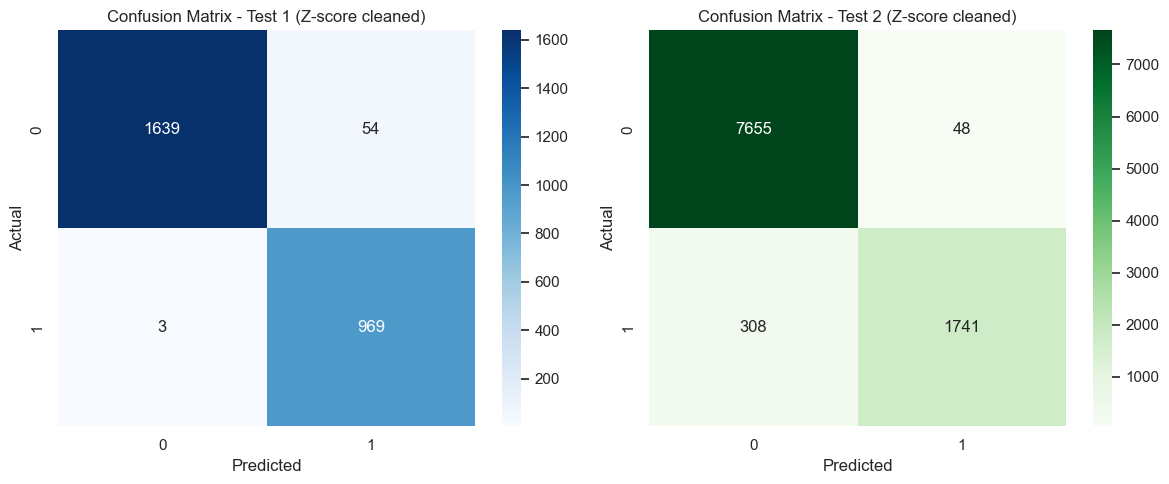

Test 1 Accuracy: 0.9786116322701689

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9634946677604594

Test 2 Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7703
           1       0.97      0.85      0.91      2049

    accuracy                           0.96      9752
   macro avg       0.97      0.92      0.94      9752
weighted avg       0.96      0.96      0.96      9752



In [22]:

from scipy.stats import zscore
# Outlier cleaning
numeric_cols = ['Light', 'CO2', 'Temperature', 'HumidityRatio']

#  Z-score calculation and threshold(|z| < 3)
z_scores = np.abs(zscore(dataTrain[numeric_cols]))
filtered_rows = (z_scores < 3).all(axis=1)

# Cleaned training data
dataTrain_clean = dataTrain[filtered_rows].copy()

# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain_clean[selected_features]
y_train = dataTrain_clean['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Pred
y_pred1 = model.predict(X_test1_scaled)
y_pred2 = model.predict(X_test2_scaled)

# Train accuracy
y_train_pred = model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))


# 8. Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Z-score cleaned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Z-score cleaned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))

print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


To improve model robustness, I removed outliers using Z-score filtering on `Light`, `CO2`, `Temperature`, and `HumidityRatio` features. Samples with absolute Z-scores greater than 3 were excluded from the training set.

**Results after training:**

- **Train Accuracy:** 0.9862  
- **Test 1 Accuracy:** 0.9786  
- **Test 2 Accuracy:** 0.9635

The confusion matrices below show that cleaning the training data helped maintain high performance on both test sets. The model generalizes well and achieves high recall and precision, especially for the occupied class (1).

## DECISION TREE MODEL TRAINING AND TESTING

Train Accuracy: 1.0


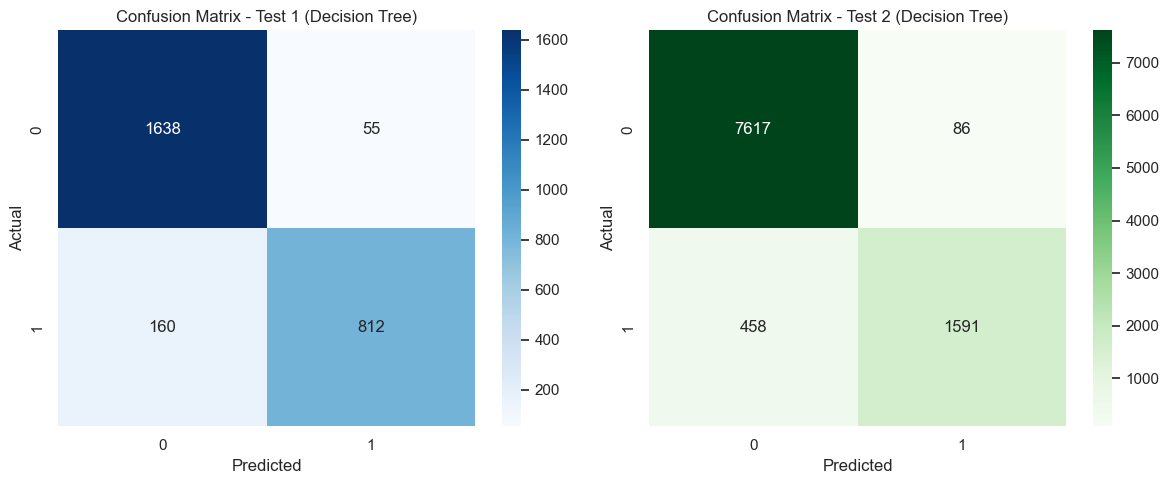

Test 1 Accuracy: 0.9193245778611632

Test 1 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1693
           1       0.94      0.84      0.88       972

    accuracy                           0.92      2665
   macro avg       0.92      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665

Test 2 Accuracy: 0.9442165709598032

Test 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7703
           1       0.95      0.78      0.85      2049

    accuracy                           0.94      9752
   macro avg       0.95      0.88      0.91      9752
weighted avg       0.94      0.94      0.94      9752



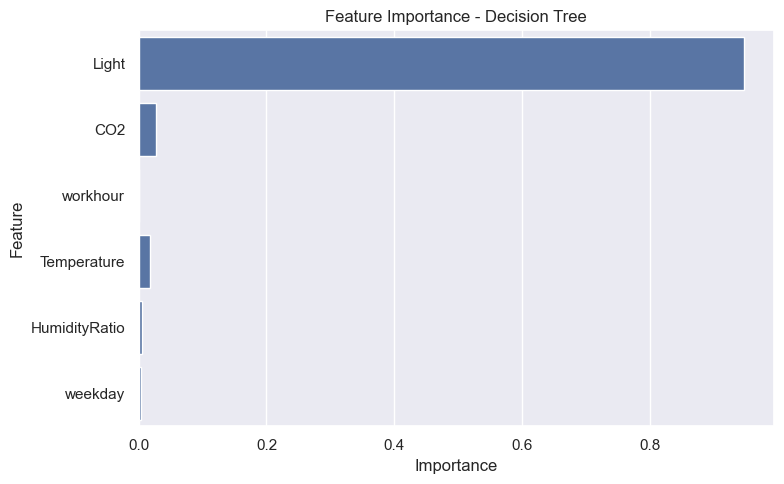

In [23]:
# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Model train
tree = DecisionTreeClassifier(random_state=42, max_depth=None)
tree.fit(X_train_scaled, y_train)

# predict
y_pred1 = tree.predict(X_test1_scaled)
y_pred2 = tree.predict(X_test2_scaled)

# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Train Accuracy
train_accuracy = accuracy_score(y_train, tree.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


# Accurcy and perfrmance
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Classification Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Classification Report:\n", classification_report(y_test2, y_pred2))

importances = tree.feature_importances_
feature_names = selected_features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




I implemented a `DecisionTreeClassifier` with default parameters to analyze occupancy based on selected features.

- **Train Accuracy:** 1.00
- **Test 1 Accuracy:** 0.9193
- **Test 2 Accuracy:** 0.9442

The model showed signs of overfitting, as it achieved perfect accuracy on the training data but relatively lower performance on test sets.

#### Feature Importance
The most dominant feature was **Light**, contributing heavily to decision-making. Other features had minimal impact.

#### Confusion Matrices and Visualizations
- Test results show that the model predicted class 0 very well but had reduced recall for class 1.
- Further tuning (e.g., limiting tree depth) will be explored to mitigate overfitting.


## TUNED DECISION TREE

Train Accuracy: 0.9958246346555324


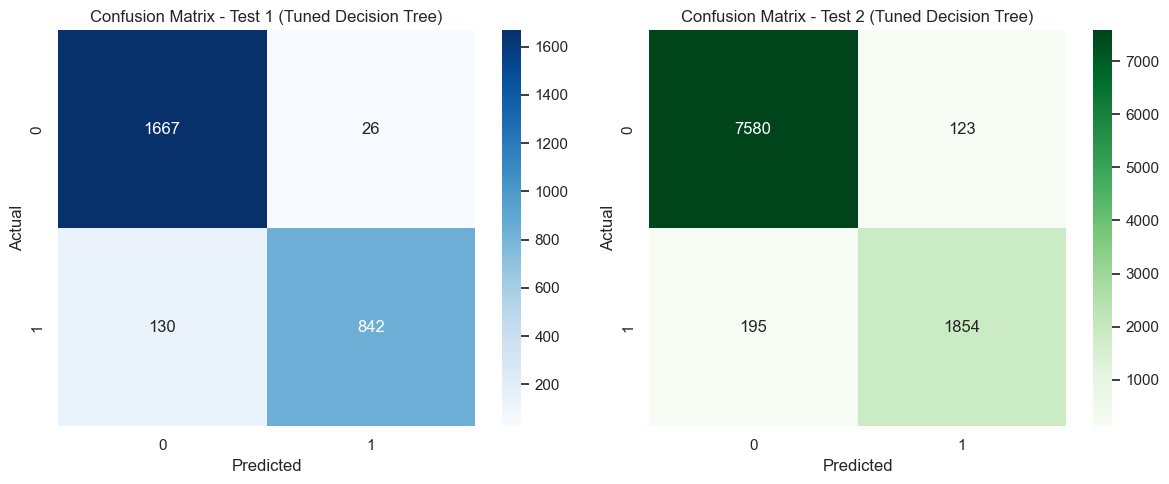

Test 1 Accuracy: 0.9414634146341463

Test 1 Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1693
           1       0.97      0.87      0.92       972

    accuracy                           0.94      2665
   macro avg       0.95      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665

Test 2 Accuracy: 0.967391304347826

Test 2 Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      7703
           1       0.94      0.90      0.92      2049

    accuracy                           0.97      9752
   macro avg       0.96      0.94      0.95      9752
weighted avg       0.97      0.97      0.97      9752



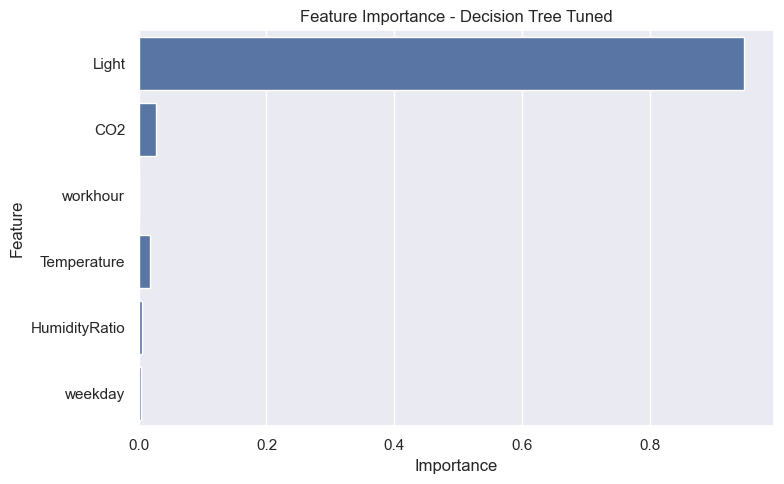

In [24]:

# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Improved decision tree model
tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
tree.fit(X_train_scaled, y_train)


y_pred1 = tree.predict(X_test1_scaled)
y_pred2 = tree.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, tree.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)

#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Tuned Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Tuned Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Accuracy an performance report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Decision Tree Tuned")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




To mitigate the overfitting observed in the baseline Decision Tree model (which achieved a perfect training accuracy of 1.0), the following regularization techniques were applied:

After applying the modifications, the model showed substantial improvements:

- **Train Accuracy:** 0.996
- **Test 1 Accuracy:** 0.941
- **Test 2 Accuracy:** 0.967
and no overfit. training accuracy is not 1. anymore!

Unlike the unregularized version, the training accuracy is now slightly below 1.0, indicating improved generalization. The confusion matrices demonstrate better recall for class 1 (Occupied), particularly in Test 2.


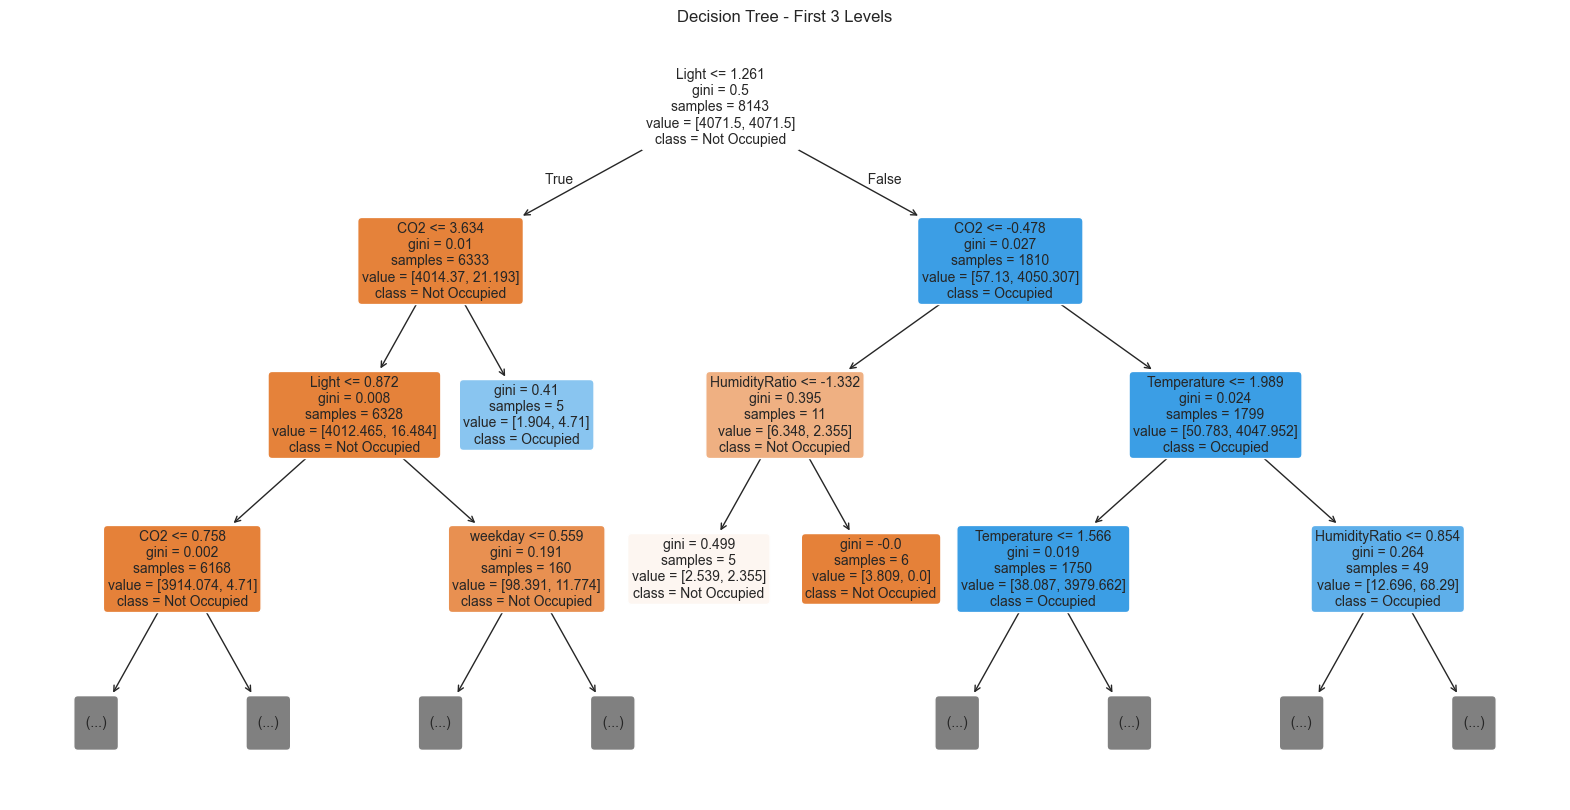

In [26]:
from sklearn.tree import plot_tree




#  Features
feature_names = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
class_names = ['Not Occupied', 'Occupied']

#  Plot Tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3 
)
plt.title("Decision Tree - First 3 Levels")
plt.show()


## RANDOM FOREST CLASSIFICATION MODEL

Test 1 Accuracy: 0.9519699812382739

Test 1 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1693
           1       0.95      0.92      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.95      0.95      2665
weighted avg       0.95      0.95      0.95      2665

Test 2 Accuracy: 0.9827727645611156

Test 2 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.97      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752

Train Accuracy: 1.0


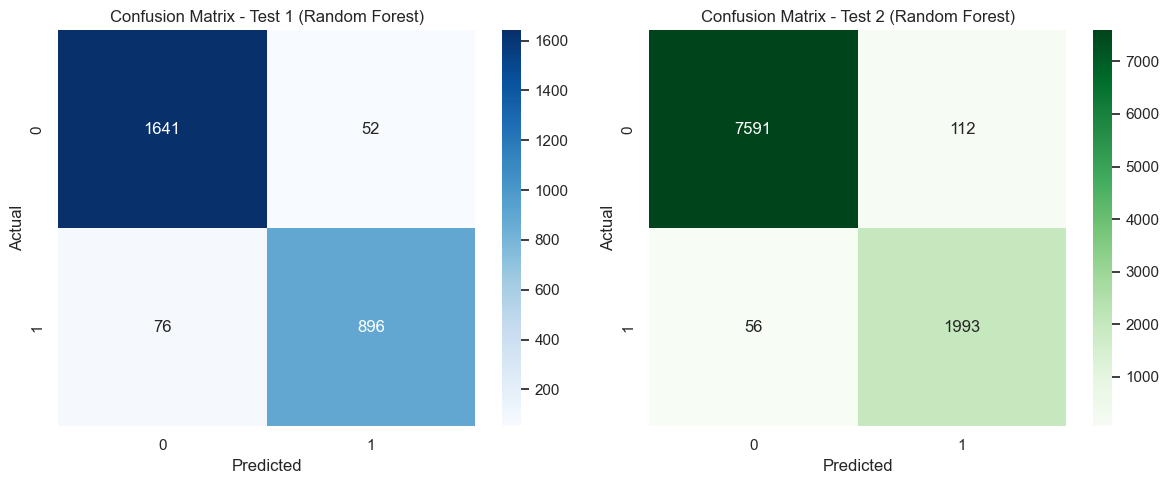

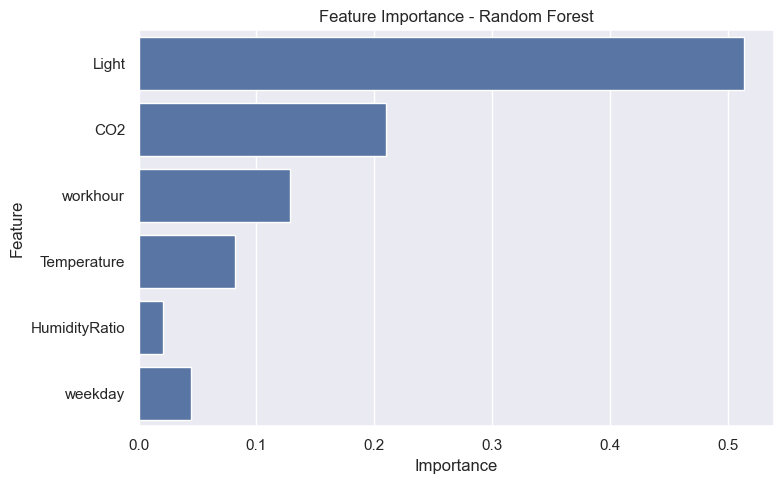

In [27]:
from sklearn.ensemble import RandomForestClassifier

#  Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']

X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Modelling and training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_pred1 = rf.predict(X_test1_scaled)
y_pred2 = rf.predict(X_test2_scaled)

# 5. Test 1 
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Classification Report:\n", classification_report(y_test1, y_pred1))
cm1 = confusion_matrix(y_test1, y_pred1)

#  Test 2
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Classification Report:\n", classification_report(y_test2, y_pred2))
cm2 = confusion_matrix(y_test2, y_pred2)

# Train Accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test 1 (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Test 2 (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Feature Importance 
importances = rf.feature_importances_
feature_names = selected_features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## TUNED RANDOM FORREST 

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Train Accuracy: 0.9955790249293872


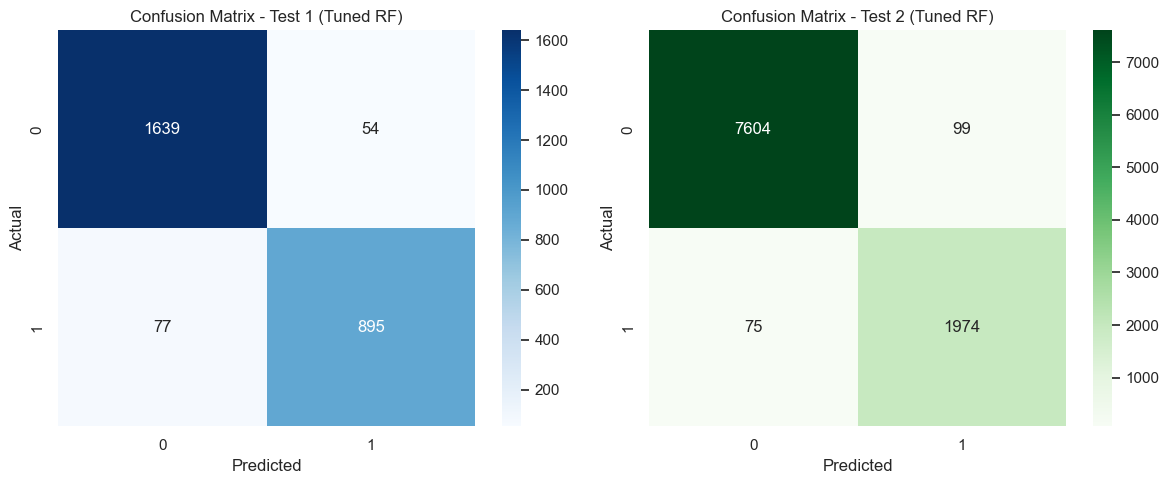

Test 1 Accuracy: 0.950844277673546

Test 1 Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1693
           1       0.94      0.92      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665

Test 2 Accuracy: 0.9821575061525841

Test 2 Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.96      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752



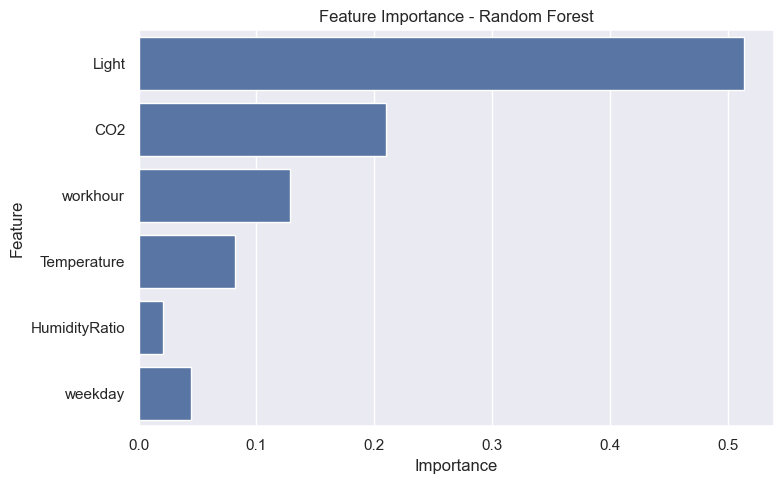

In [28]:


# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

#  Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}

#  GridSearchCV 
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Choosing best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


y_pred1 = best_rf.predict(X_test1_scaled)
y_pred2 = best_rf.predict(X_test2_scaled)
#  Train Accuracy
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

#  plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test 1 (Tuned RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Test 2 (Tuned RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))

importances = rf.feature_importances_
feature_names = selected_features
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()





The model was optimized using GridSearchCV, selecting 200 estimators, max depth of 10, and a minimum of 5 samples per leaf. Train accuracy dropped below 1.0, indicating reduced overfitting, while test performance improved. Feature importance remained largely unchanged.


## Gaussian Naive Bayes Classifier


Train Accuracy: 0.9729829301240329


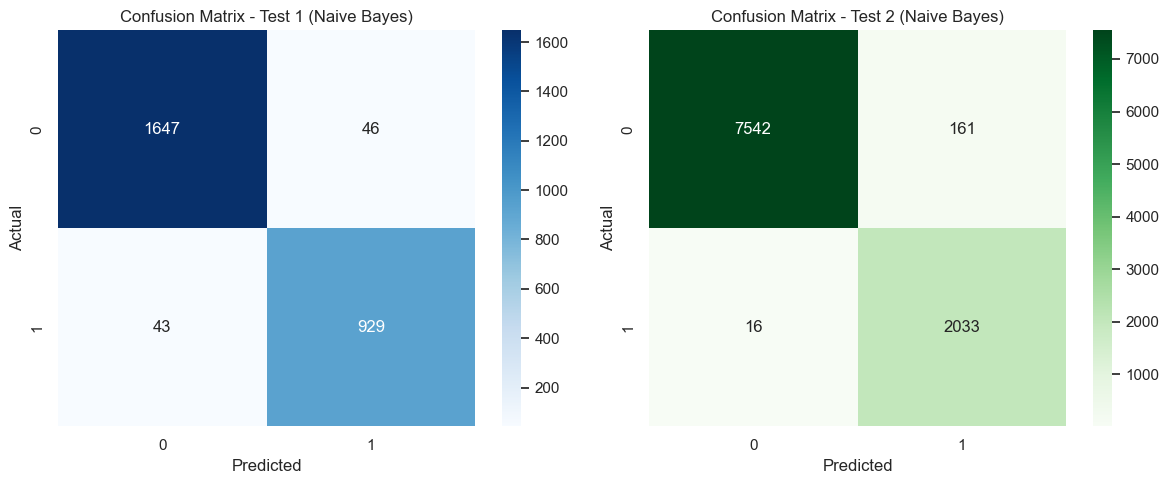

Test 1 Accuracy: 0.9666041275797373

Test 1 Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.96      0.95       972

    accuracy                           0.97      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.9818498769483183

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.93      0.99      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.96      0.99      0.97      9752
weighted avg       0.98      0.98      0.98      9752



In [29]:
from sklearn.naive_bayes import GaussianNB


# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

#  StandarT Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


y_pred1 = nb.predict(X_test1_scaled)
y_pred2 = nb.predict(X_test2_scaled)

# Train Accuracy
train_pred = nb.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# 6. Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 7. Analysis
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


The Gaussian Naive Bayes model, trained with default parameters, achieved strong results:

- **Train Accuracy:** 0.973
- **Test 1 Accuracy:** 0.967
- **Test 2 Accuracy:** 0.982

The performance suggests that the model generalizes well. The small difference between training and test accuracy indicates there is no overfitting or underfitting. It's an effective baseline with minimal complexity.

## Gaussian Naive Bayes with Z-Score Cleaning



Train Accuracy: 0.9727479182437547


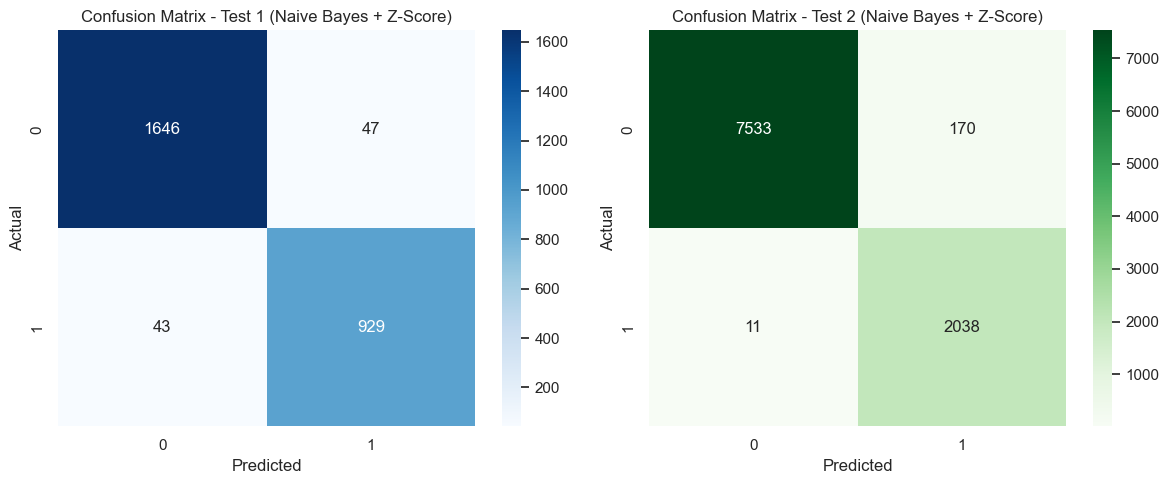

Test 1 Accuracy: 0.9662288930581614

Test 1 Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.96      0.95       972

    accuracy                           0.97      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.9814397046759639

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.92      0.99      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.96      0.99      0.97      9752
weighted avg       0.98      0.98      0.98      9752



In [30]:
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB


#  Z-score cleaning
z_features = ['Light', 'CO2', 'Temperature', 'HumidityRatio']
z_scores = np.abs(zscore(dataTrain[z_features]))
clean_rows = (z_scores < 3).all(axis=1)
dataTrain_clean = dataTrain[clean_rows].copy()

# Feature and target
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain_clean[selected_features]
y_train = dataTrain_clean['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Gaussian Naive Bayes 
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


y_pred1 = nb.predict(X_test1_scaled)
y_pred2 = nb.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, nb.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Naive Bayes + Z-Score)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Naive Bayes + Z-Score)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Accuracy performance
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


- Applied Z-Score outlier cleaning on ['Light', 'CO2', 'Temperature', 'HumidityRatio']
- Cleaned training data was scaled and used to train GaussianNB
  
Z-score cleaning slightly improved generalization. The model already performed well, so gains are minor. It now shows more consistent and reliable prediction for the 'Occupied' class. No overfitting or underfitting is present.

## KNN CLASSIFIER

Train Accuracy: 0.9950878054770969


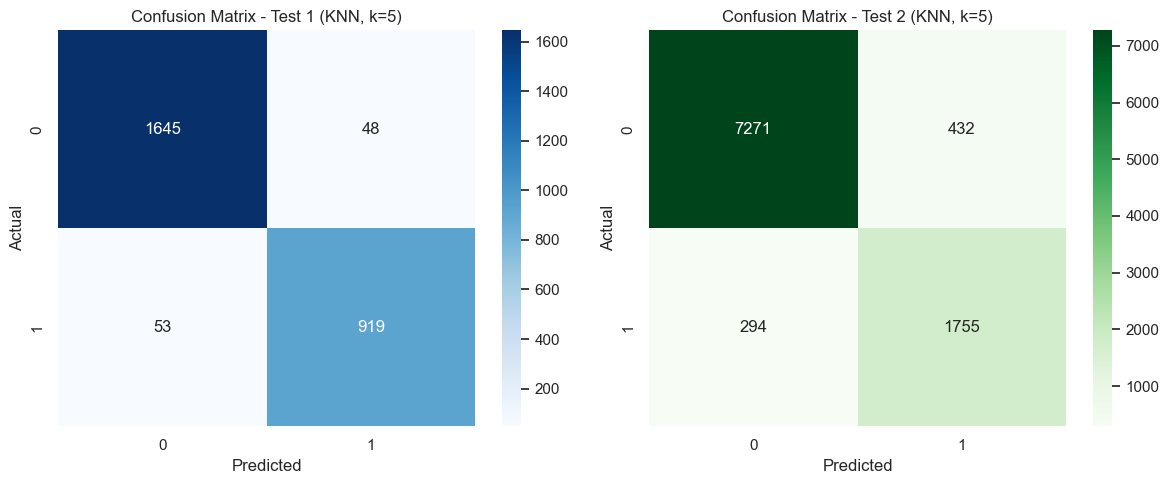

Test 1 Accuracy: 0.9621013133208255

Test 1 Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665

Test 2 Accuracy: 0.9255537325676785

Test 2 Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7703
           1       0.80      0.86      0.83      2049

    accuracy                           0.93      9752
   macro avg       0.88      0.90      0.89      9752
weighted avg       0.93      0.93      0.93      9752



In [31]:
from sklearn.neighbors import KNeighborsClassifier


# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

#  KNN Model (k=5 )
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred1 = knn.predict(X_test1_scaled)
y_pred2 = knn.predict(X_test2_scaled)

# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)
# Train Accuracy
train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (KNN, k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (KNN, k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# accuracy
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


KNN (k=5) gave strong performance on training and Test 1, but showed lower accuracy on Test 2. This suggests overfitting: the model fits training data too well but generalizes less effectively.


## TUNED KNN

Best KNN Parameters: {'n_neighbors': 17, 'weights': 'uniform'}
Train Accuracy: 0.9918948790372099


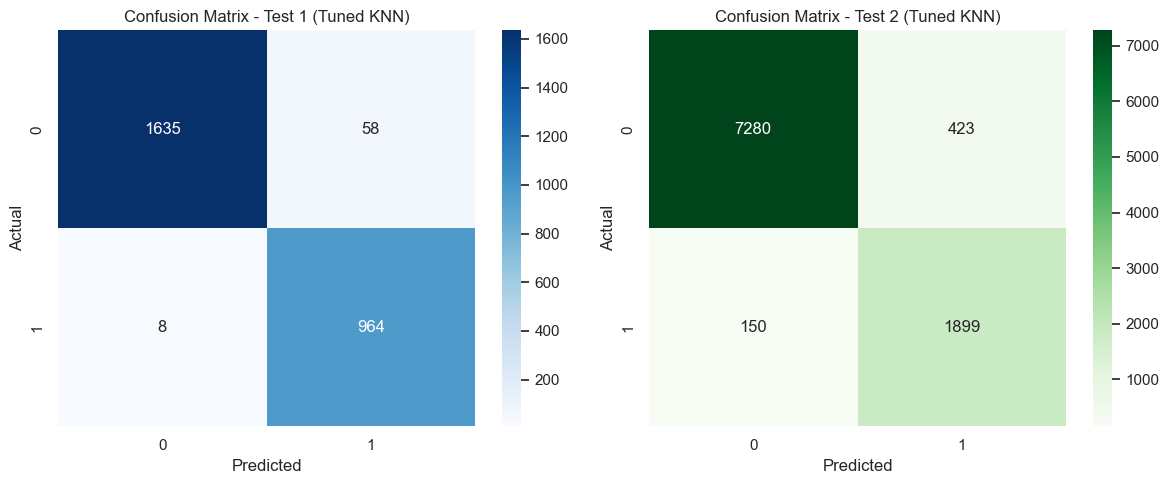

Test 1 Accuracy: 0.975234521575985

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.94      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9412428219852338

Test 2 Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      7703
           1       0.82      0.93      0.87      2049

    accuracy                           0.94      9752
   macro avg       0.90      0.94      0.92      9752
weighted avg       0.95      0.94      0.94      9752



In [32]:


#  Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# 3. Grid Search to find best k and weights
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Pick best model
best_knn = grid.best_estimator_
print("Best KNN Parameters:", grid.best_params_)


y_pred1 = best_knn.predict(X_test1_scaled)
y_pred2 = best_knn.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, best_knn.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Tuned KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Tuned KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


- Tuned KNN used GridSearch to find the best `n_neighbors=17` and `weights='uniform'`.
- Train accuracy slightly dropped from 0.9950 to 0.9919, reducing overfitting.
- Test 1 accuracy improved to 97.5% and Test 2 accuracy to 94.1%.
- Overall, tuning enhanced generalization, especially on minority class recall.


## KNN WITH Z-SCORE OUTLIER CLEANING 

Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}
Train Accuracy: 0.9934393136512742


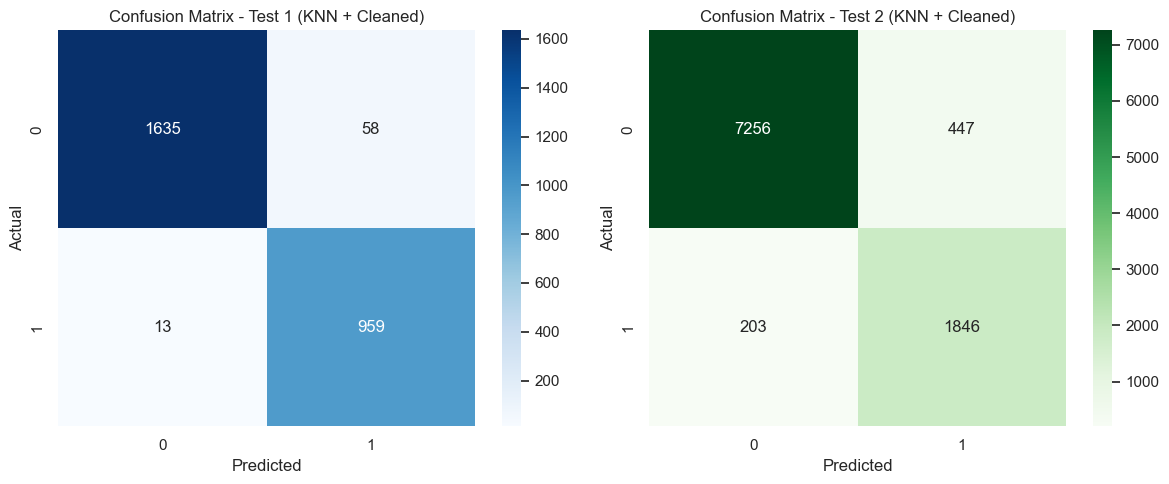

Test 1 Accuracy: 0.973358348968105

Test 1 Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.94      0.99      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.9333470057424118

Test 2 Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7703
           1       0.81      0.90      0.85      2049

    accuracy                           0.93      9752
   macro avg       0.89      0.92      0.90      9752
weighted avg       0.94      0.93      0.93      9752



In [33]:


# Z-score outlier cleaning
z_cols = ['Light', 'CO2', 'Temperature', 'HumidityRatio']
z_scores = np.abs(zscore(dataTrain[z_cols]))
clean_rows = (z_scores < 3).all(axis=1)
dataTrain_clean = dataTrain[clean_rows].copy()

# Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain_clean[selected_features]
y_train = dataTrain_clean['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Grid Search optimized KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


y_pred1 = best_knn.predict(X_test1_scaled)
y_pred2 = best_knn.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, best_knn.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (KNN + Cleaned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (KNN + Cleaned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))




the KNN model is improved by removing outliers using Z-score and tuning hyperparameters with GridSearch. The best model used 11 neighbors and uniform weights. Train accuracy was 0.9934, Test 1 accuracy was 0.9733, and Test 2 accuracy was 0.9333.

Compared to previous models, this one shows better balance between training and testing. However, the model with 17 neighbors (without cleaning) had slightly higher Test 2 accuracy, making it the best among KNNs.


## KERNELIZED SUUPPORT VECTOR MODEL TRAINING AND TESTING


Train Accuracy: 0.9888247574603954


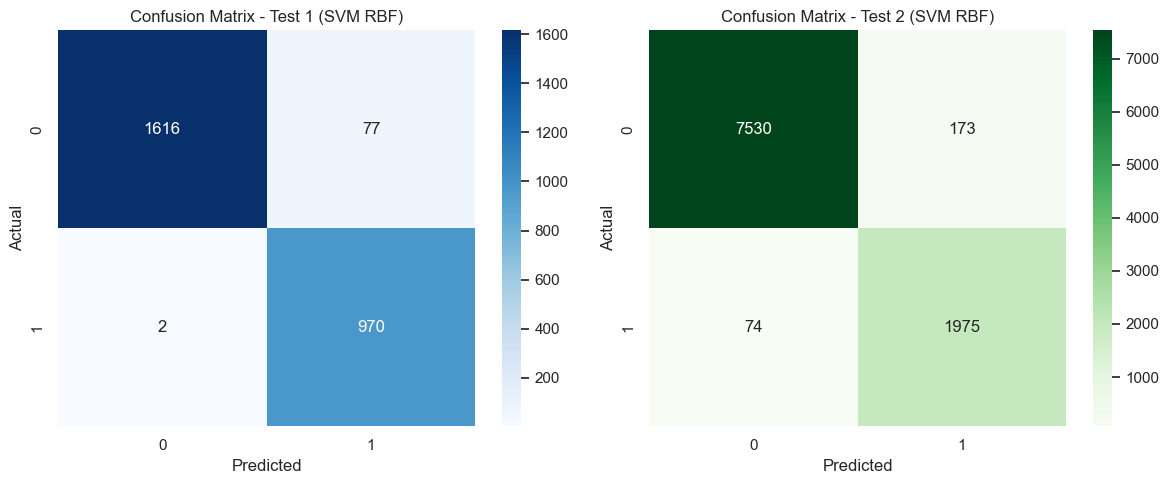

Test 1 Accuracy: 0.9703564727954972

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.9746718621821165

Test 2 Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7703
           1       0.92      0.96      0.94      2049

    accuracy                           0.97      9752
   macro avg       0.95      0.97      0.96      9752
weighted avg       0.98      0.97      0.97      9752



In [34]:
from sklearn.svm import SVC

#  Feature set
selected_features = ['Light', 'CO2', 'workhour', 'Temperature', 'HumidityRatio', 'weekday']
X_train = dataTrain[selected_features]
y_train = dataTrain['Occupancy']
X_test1 = dataTest[selected_features]
y_test1 = dataTest['Occupancy']
X_test2 = dataTest2[selected_features]
y_test2 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

#  RBF Kernel SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma='scale' varsayılan ayar
svm.fit(X_train_scaled, y_train)


y_pred1 = svm.predict(X_test1_scaled)
y_pred2 = svm.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, svm.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (SVM RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (SVM RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# performance report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


 The SVM model shows excellent generalization with nearly equal performance across both test sets and training data. The balance between precision and recall is strong, especially for the positive class (occupancy = 1). It is one of the best models so far in terms of stability and accuracy.

## TUNED KERNELIZED SUPPORT MECHANISM

Best SVM Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Train Accuracy: 0.988947562323468


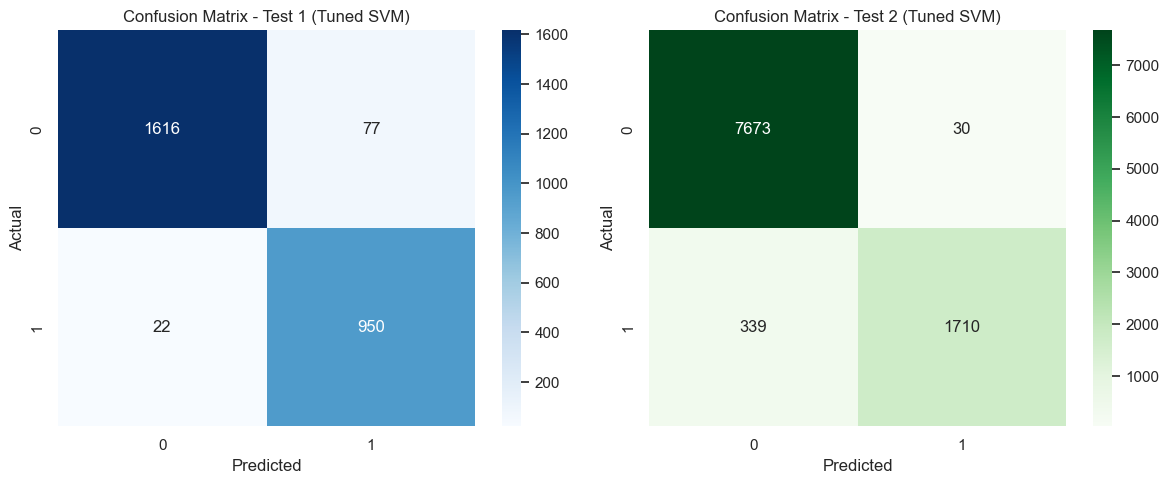

Test 1 Accuracy: 0.9628517823639775

Test 1 Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.93      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.96      0.96      0.96      2665

Test 2 Accuracy: 0.9621616078753076

Test 2 Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      7703
           1       0.98      0.83      0.90      2049

    accuracy                           0.96      9752
   macro avg       0.97      0.92      0.94      9752
weighted avg       0.96      0.96      0.96      9752



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# paramater grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# 2. GridSearchCV best combination
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_svm = grid.best_estimator_
print("Best SVM Parameters:", grid.best_params_)


y_pred1 = best_svm.predict(X_test1_scaled)
y_pred2 = best_svm.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, best_svm.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

#plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Tuned SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Tuned SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# performance
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))



Compared to default SVM, accuracy slightly dropped. Default model generalizes better.


## NEURAL NETWORK

Train Accuracy: 0.9874739039665971
Test 1 Accuracy: 0.9786116322701689

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9839007383100903

Test 2 Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7703
           1       0.94      0.98      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.98      0.98      0.98      9752



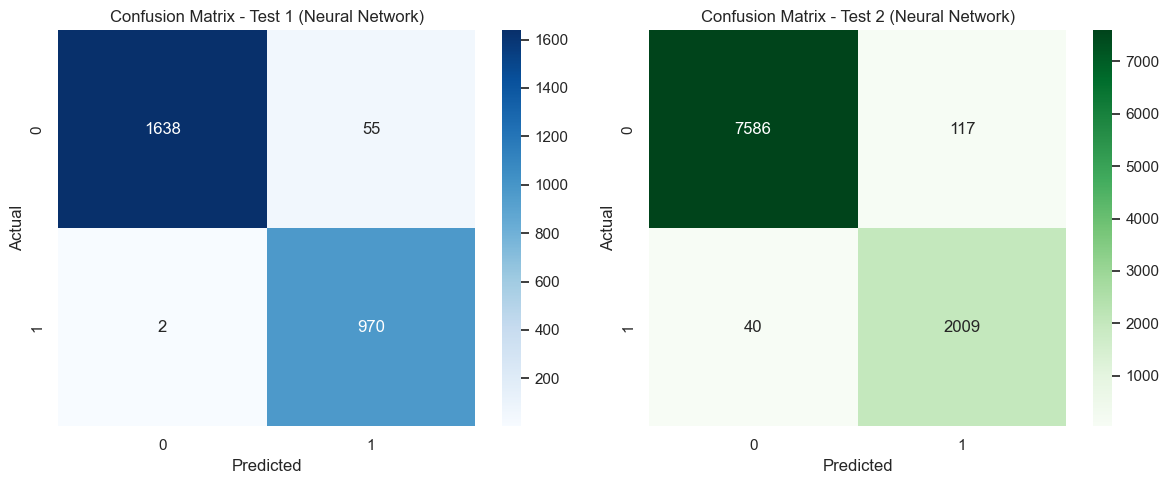

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 20),  # simple
    solver='adam',
    early_stopping=True,          # Reducing the risk of overfitting
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred1 = mlp.predict(X_test1_scaled)
y_pred2 = mlp.predict(X_test2_scaled)

# Train accuracy
train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)

print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))



# Confusion matrices
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Plot confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()





Architecture: 2 hidden layers (50, 20 neurons)
Optimizer: Adam, Early stopping enabled

 Strongest generalization across all models  
 Low overfitting risk  



## Trying the best models with different feature set


Logistic regression


Best C: 100
Train Accuracy: 0.9882107331450325
Test 1 Accuracy: 0.9782363977485928

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test 2 Accuracy: 0.993129614438064

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



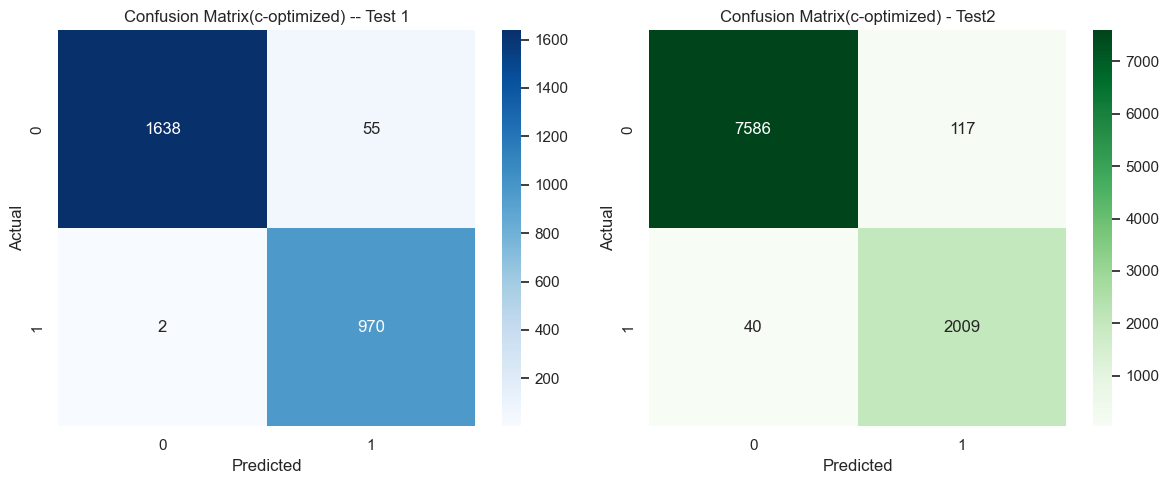

In [37]:
from sklearn.model_selection import GridSearchCV
#  Feature and label
selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

#  Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)

#  grid search for c
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# best model
best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])


y_pred1 = best_model.predict(X_test1_scaled)
y_pred2 = best_model.predict(X_test2_scaled)

# Train Accuracy
y_pred_train = best_model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# performance
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("\nTest 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))

# Confusion Matrix Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix(c-optimized) -- Test 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix(c-optimized) - Test2")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


decision tree

Train Accuracy: 0.9905440255434115


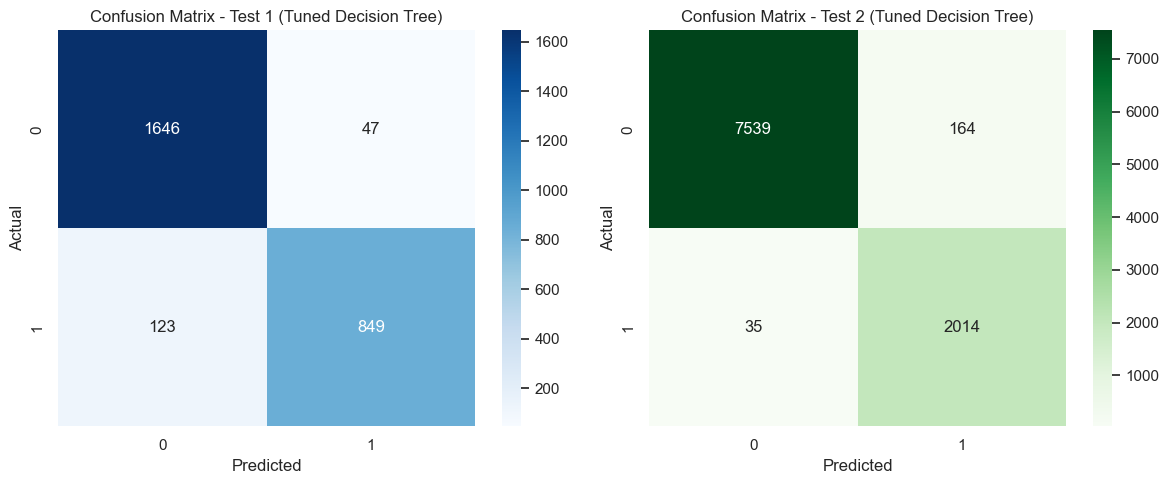

Test 1 Accuracy: 0.9362101313320825

Test 1 Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1693
           1       0.95      0.87      0.91       972

    accuracy                           0.94      2665
   macro avg       0.94      0.92      0.93      2665
weighted avg       0.94      0.94      0.94      2665

Test 2 Accuracy: 0.9795939294503692

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.92      0.98      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.96      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752



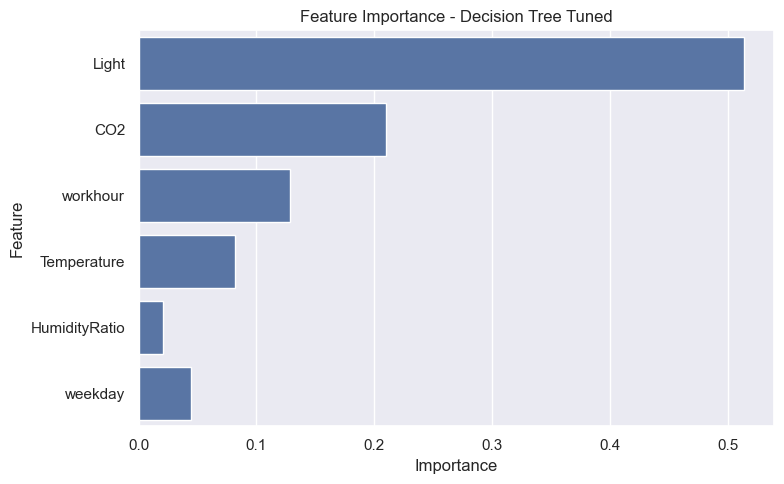

In [38]:

selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)

# Improved decision tree model
tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
tree.fit(X_train_scaled, y_train)


y_pred1 = tree.predict(X_test1_scaled)
y_pred2 = tree.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, tree.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)

#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Tuned Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Tuned Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Accuracy an performance report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Decision Tree Tuned")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




random forest

Test 1 Accuracy: 0.9422138836772983

Test 1 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.95      0.89      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665

Test 2 Accuracy: 0.9649302707136997

Test 2 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7703
           1       0.88      0.96      0.92      2049

    accuracy                           0.96      9752
   macro avg       0.94      0.96      0.95      9752
weighted avg       0.97      0.96      0.97      9752

Train Accuracy: 1.0


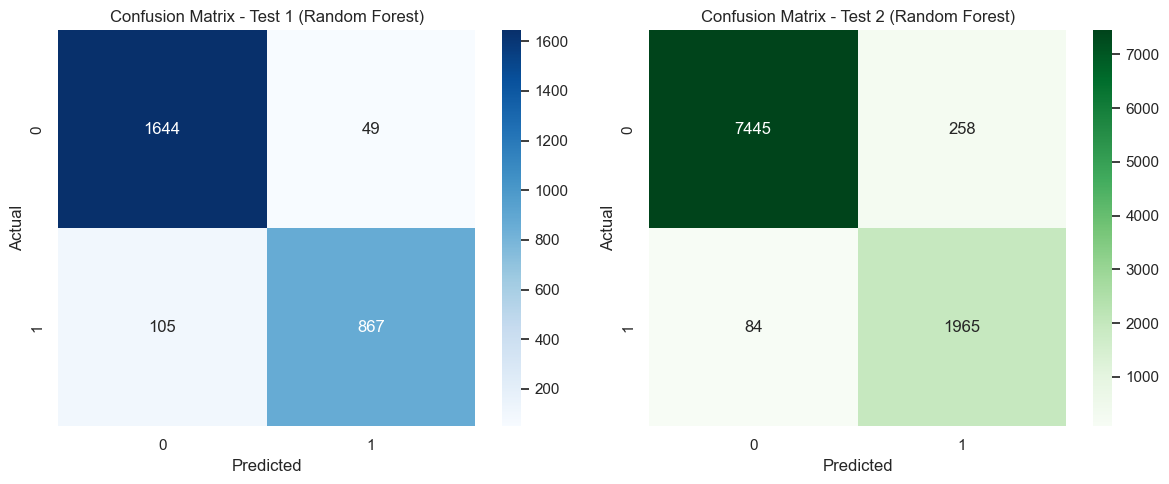

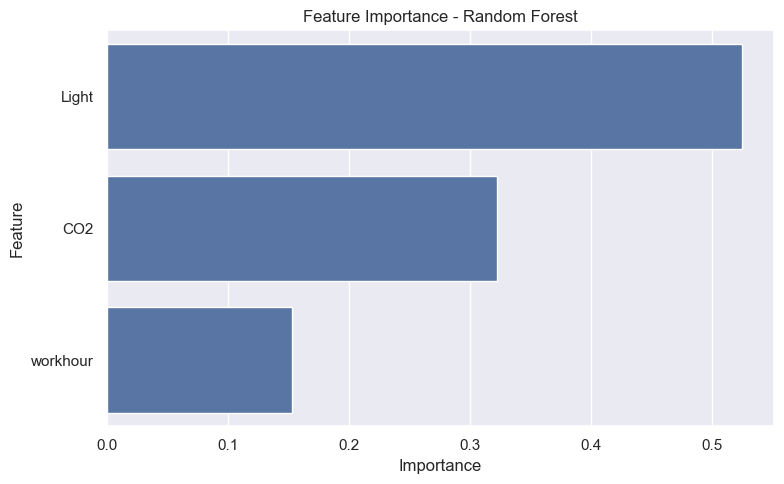

In [39]:
from sklearn.ensemble import RandomForestClassifier

selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)

# Modelling and training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_pred1 = rf.predict(X_test1_scaled)
y_pred2 = rf.predict(X_test2_scaled)

# 5. Test 1 
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Classification Report:\n", classification_report(y_test1, y_pred1))
cm1 = confusion_matrix(y_test1, y_pred1)

#  Test 2
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Classification Report:\n", classification_report(y_test2, y_pred2))
cm2 = confusion_matrix(y_test2, y_pred2)

# Train Accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test 1 (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Test 2 (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Feature Importance 
importances = rf.feature_importances_
feature_names = selected_features_2

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


naive bayes

Train Accuracy: 0.9733513447132507


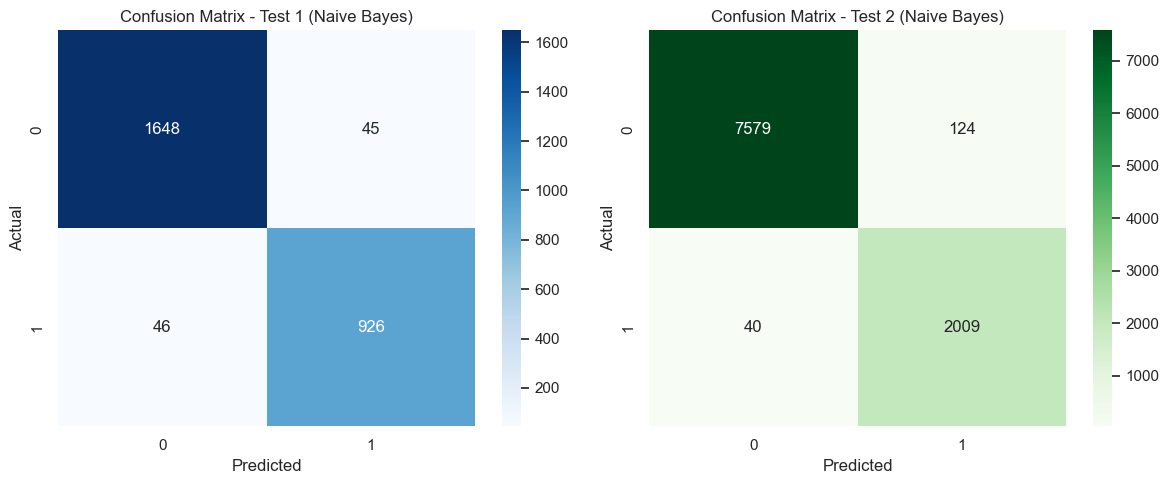

Test 1 Accuracy: 0.9658536585365853

Test 1 Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.97      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.98318293683347

Test 2 Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7703
           1       0.94      0.98      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.98      0.98      0.98      9752



In [40]:
from sklearn.naive_bayes import GaussianNB


selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)

# Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


y_pred1 = nb.predict(X_test1_scaled)
y_pred2 = nb.predict(X_test2_scaled)

# Train Accuracy
train_pred = nb.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# 6. Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 7. Analysis
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


knn

Best KNN Parameters: {'n_neighbors': 17, 'weights': 'uniform'}
Train Accuracy: 0.9888247574603954


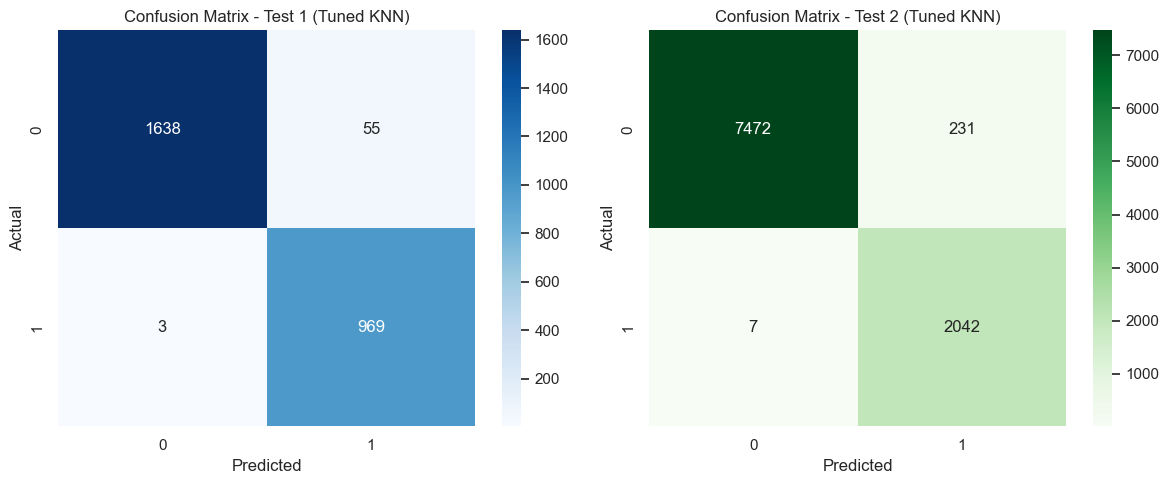

Test 1 Accuracy: 0.9782363977485928

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9755947497949139

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      7703
           1       0.90      1.00      0.94      2049

    accuracy                           0.98      9752
   macro avg       0.95      0.98      0.96      9752
weighted avg       0.98      0.98      0.98      9752



In [41]:


selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)


# 3. Grid Search to find best k and weights
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Pick best model
best_knn = grid.best_estimator_
print("Best KNN Parameters:", grid.best_params_)


y_pred1 = best_knn.predict(X_test1_scaled)
y_pred2 = best_knn.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, best_knn.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Tuned KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Tuned KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


kernelized support vector

Train Accuracy: 0.9895615866388309


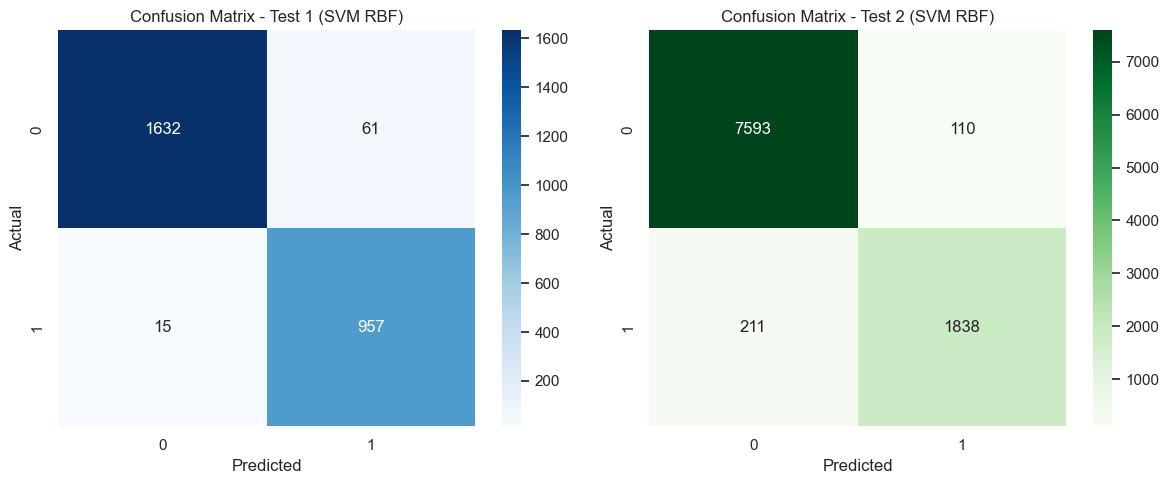

Test 1 Accuracy: 0.9714821763602252

Test 1 Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1693
           1       0.94      0.98      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.97      0.97      2665
weighted avg       0.97      0.97      0.97      2665

Test 2 Accuracy: 0.9670836751435603

Test 2 Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7703
           1       0.94      0.90      0.92      2049

    accuracy                           0.97      9752
   macro avg       0.96      0.94      0.95      9752
weighted avg       0.97      0.97      0.97      9752



In [42]:
from sklearn.svm import SVC

selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)


#  RBF Kernel SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma='scale' varsayılan ayar
svm.fit(X_train_scaled, y_train)


y_pred1 = svm.predict(X_test1_scaled)
y_pred2 = svm.predict(X_test2_scaled)

# Train Accuracy
train_accuracy = accuracy_score(y_train, svm.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)


#  Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (SVM RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (SVM RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# performance report
print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))


neural network

Train Accuracy: 0.9883335380081051
Test 1 Accuracy: 0.9782363977485928

Test 1 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

Test 2 Accuracy: 0.9766201804757998

Test 2 Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      7703
           1       0.90      1.00      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.95      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752



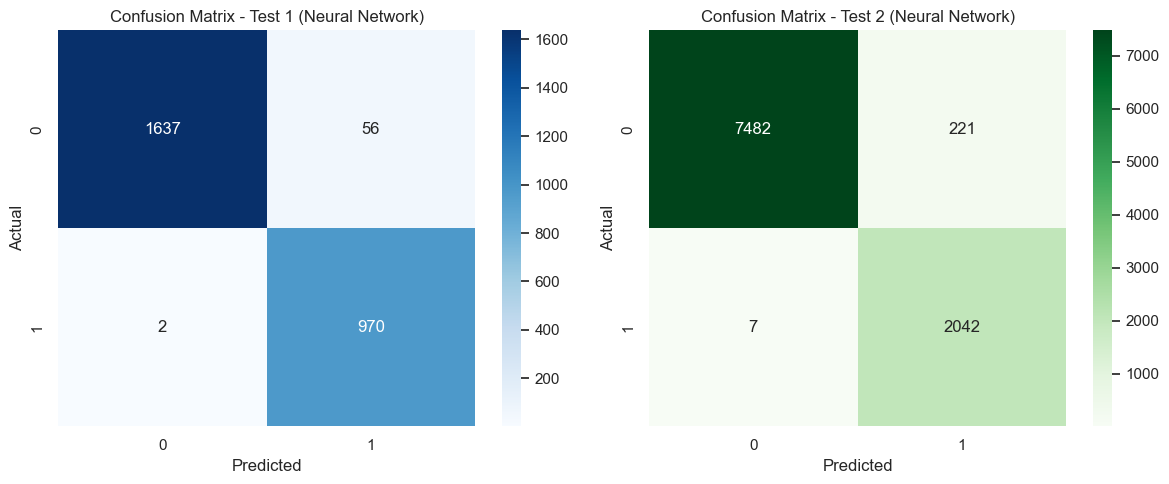

In [43]:
from sklearn.neural_network import MLPClassifier
selected_features_2 = ['Light',  'CO2', 'workhour']

X_train2 = dataTrain[selected_features_2]
y_train2 = dataTrain['Occupancy']
X_test12 = dataTest[selected_features_2]
y_test12 = dataTest['Occupancy']
X_test22 = dataTest2[selected_features_2]
y_test22 = dataTest2['Occupancy']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test1_scaled = scaler.transform(X_test12)
X_test2_scaled = scaler.transform(X_test22)

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 20),  # simple
    solver='adam',
    early_stopping=True,          # Reducing the risk of overfitting
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred1 = mlp.predict(X_test1_scaled)
y_pred2 = mlp.predict(X_test2_scaled)

# Train accuracy
train_accuracy = accuracy_score(y_train, mlp.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)

print("Test 1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nTest 1 Report:\n", classification_report(y_test1, y_pred1))
print("Test 2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nTest 2 Report:\n", classification_report(y_test2, y_pred2))



# Confusion matrices
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)

# Plot confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test 1 (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test 2 (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

